In [1]:
#1. import library
import os 
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from sklearn import tree
import time
import warnings
warnings.filterwarnings('ignore')


# Load data
data = pd.read_csv("cleaneddata.csv")

# Split the data into features (X) and target (y)
# Assuming 'Condition' is the target column and the rest are features
X = data.drop(columns=['Condition'])  # Features
y = data['Condition']  # Target

# Convert X and y to DataFrames
X = pd.DataFrame(X)
y = pd.DataFrame(y)

# Print the length of the data
print("Data length:", len(y))




Data length: 116


In [3]:
# create save path
path = os.getcwd()
savePath = path + '/decision_tree_results/'
print(savePath)

C:\Users\Jason/decision_tree_results/


Training data length: 87
Verification data length: 29
Accuracy: 0.8621
Classification Report:
               precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29

Training data length: 87
Verification data length: 29
Accuracy: 0.8966
Classification Report:
               precision    recall  f1-score   support

  Condition1       1.00      0.50      0.67         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.81      1.00      0.90        13

    accuracy                           0.90        29
   macro avg       0.94      0.83      0.85        29
weighted avg       0.92      0.90      0.88        29

Training data length: 87
Verification data lengt

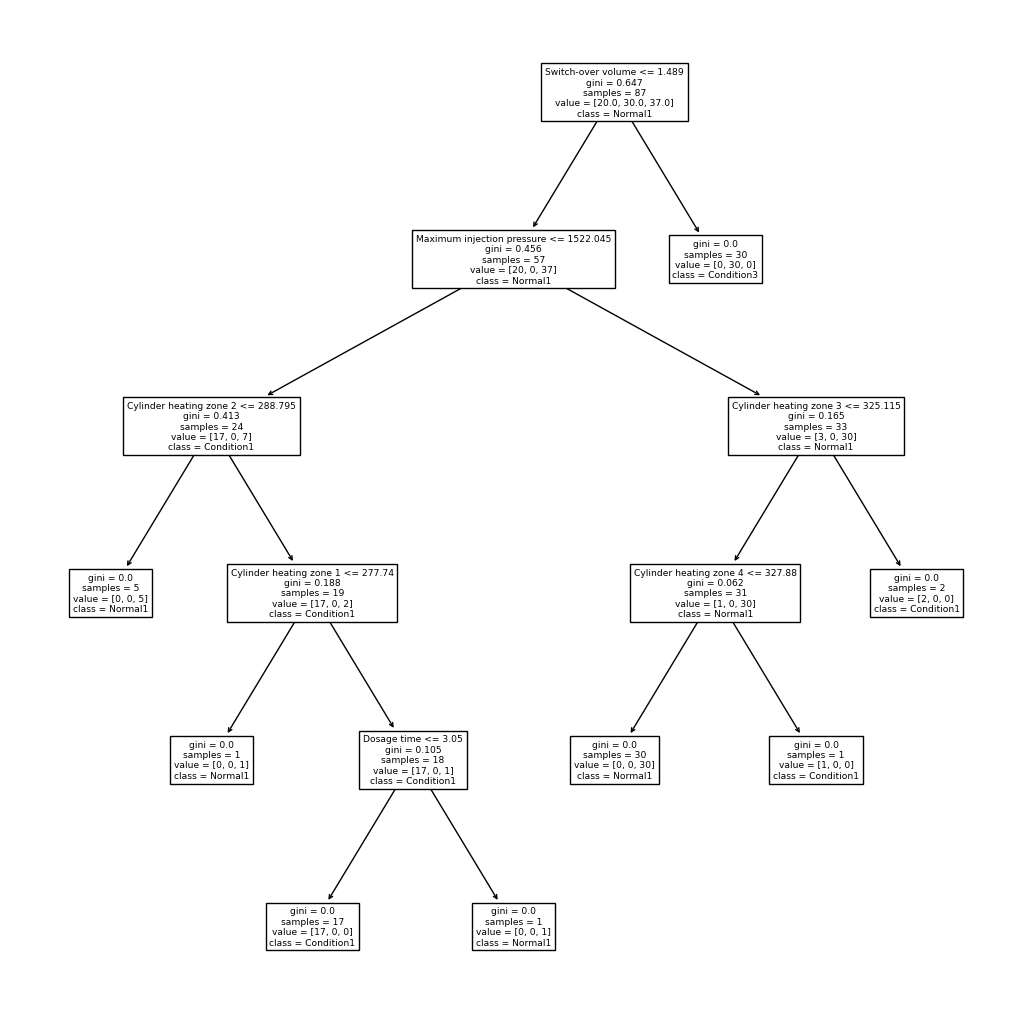

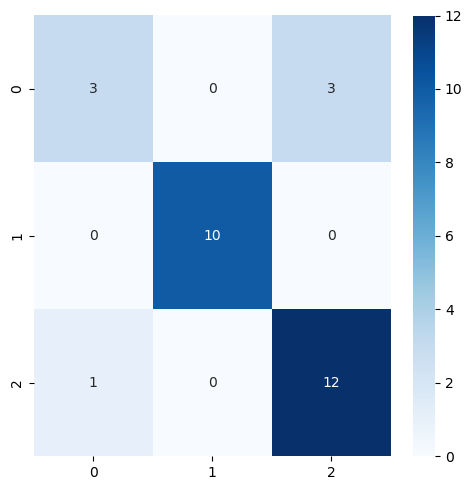

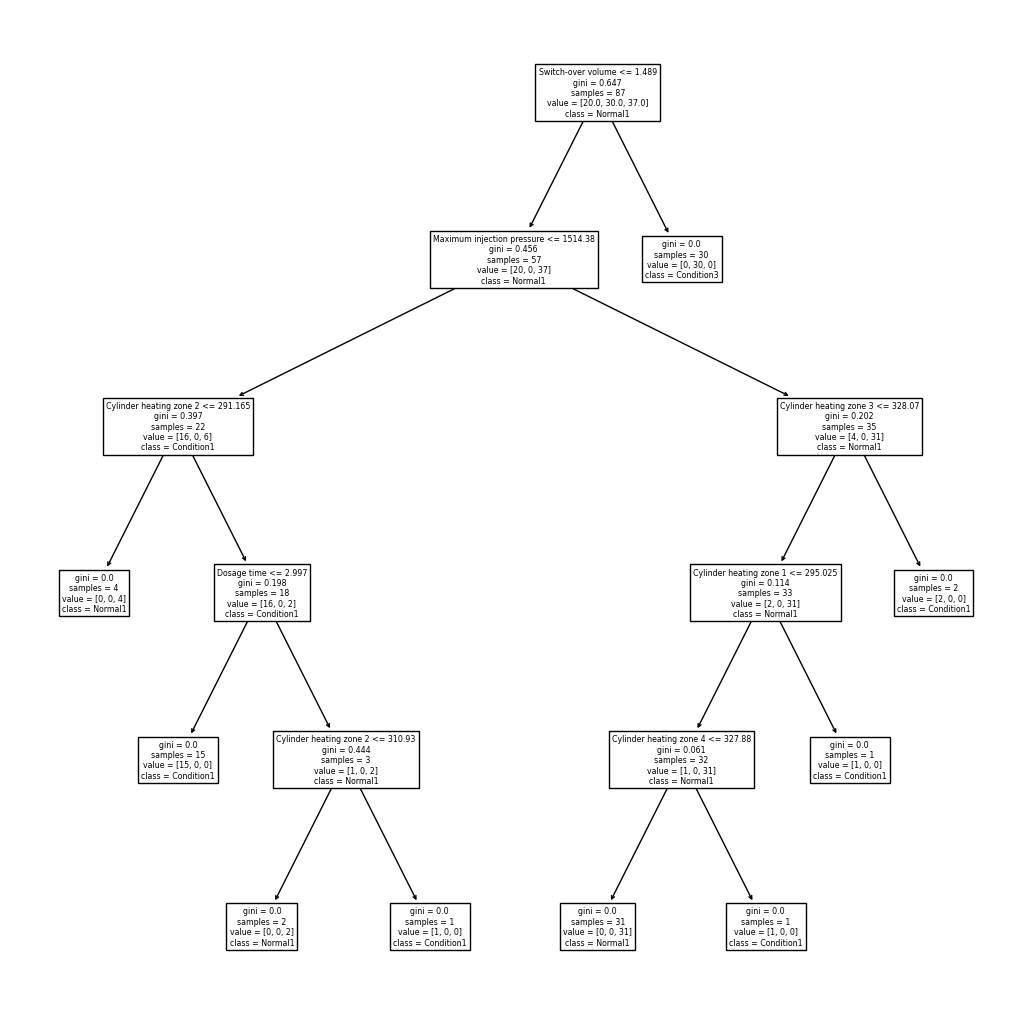

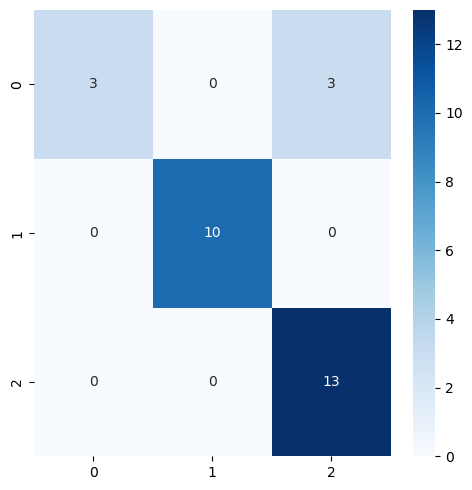

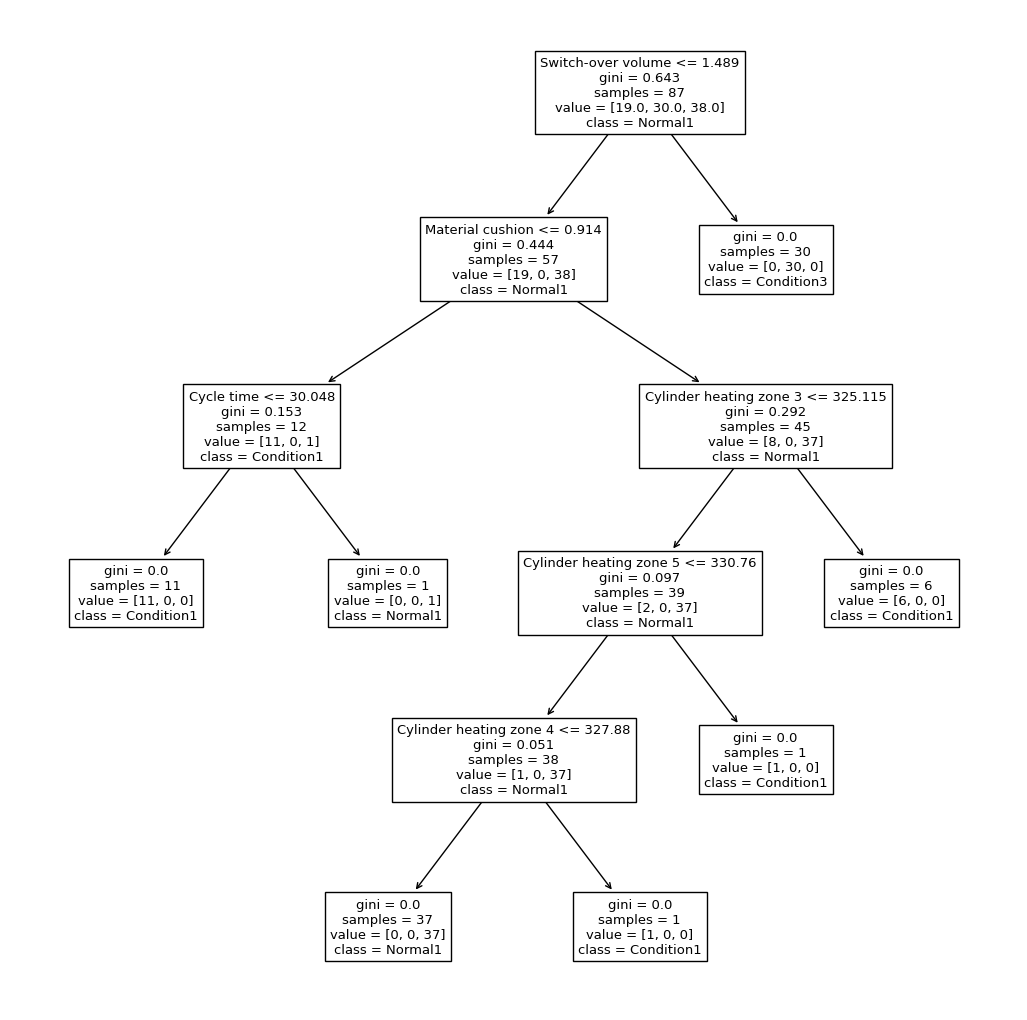

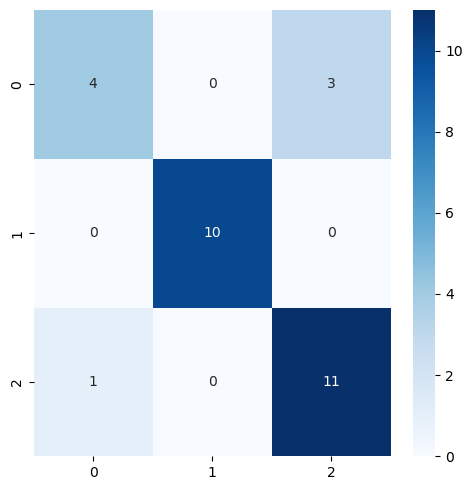

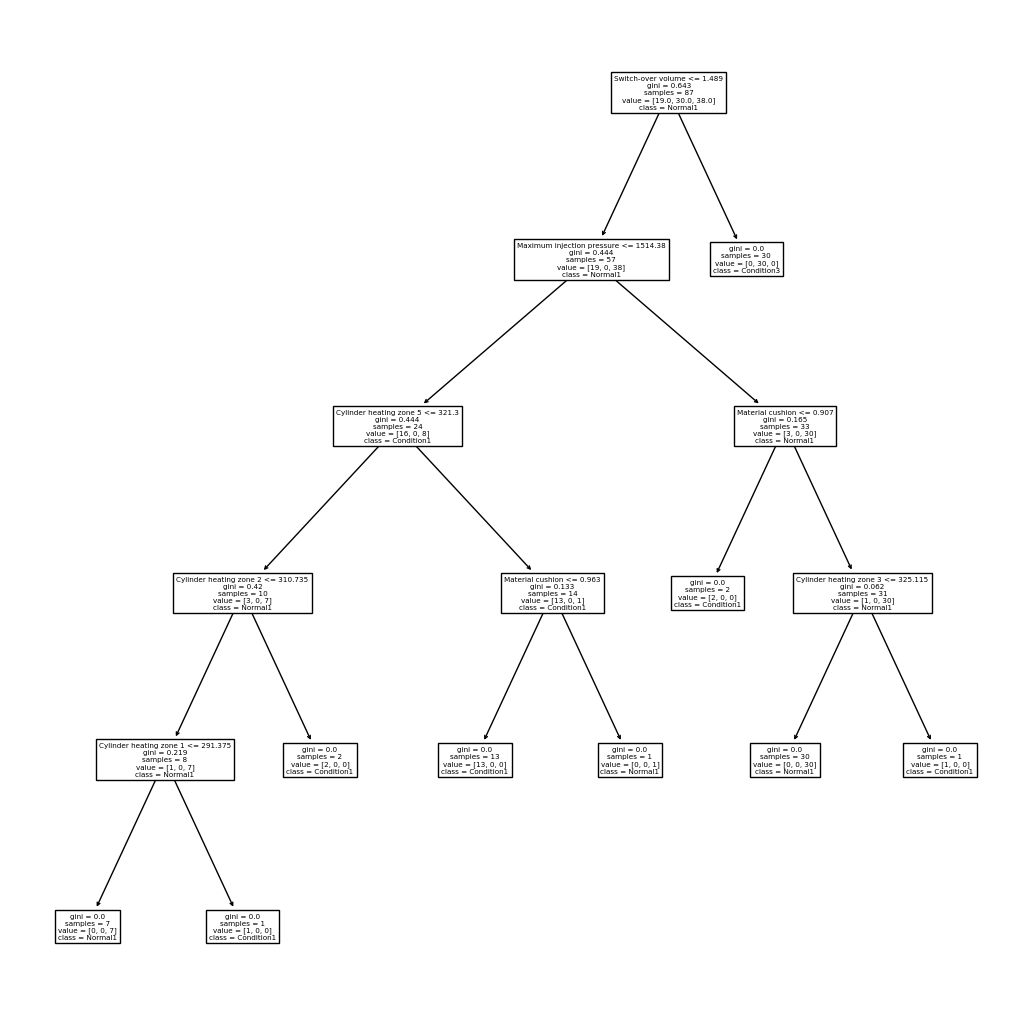

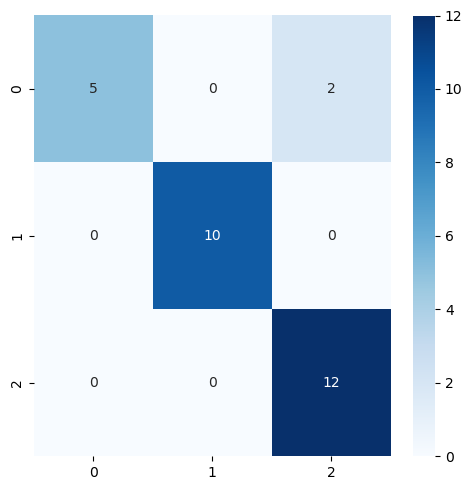

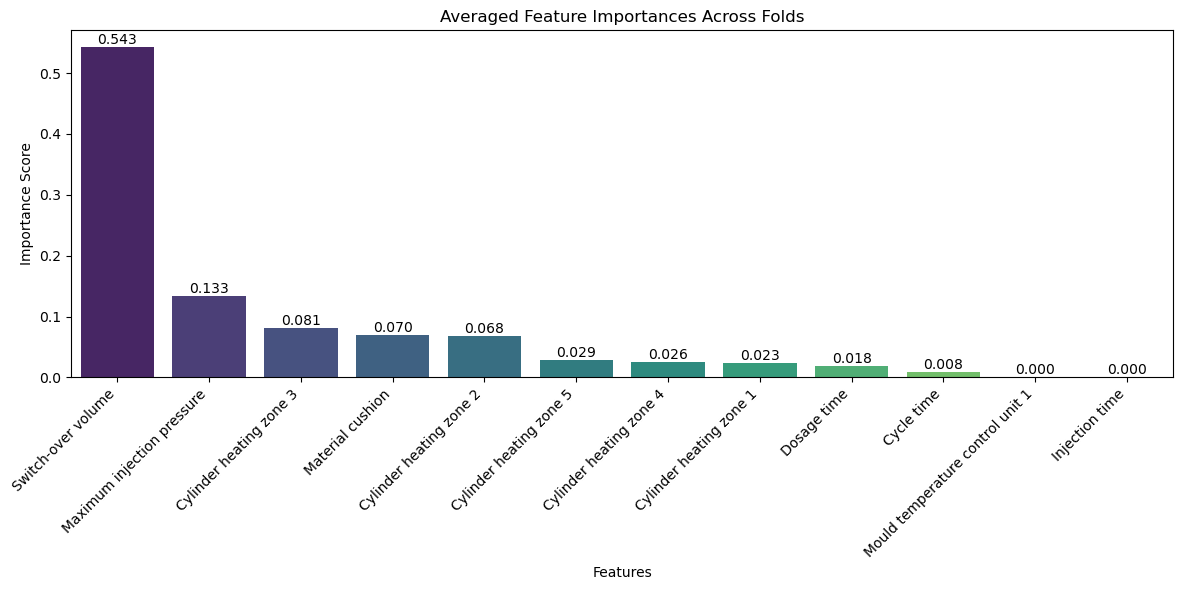

Average accuracy across folds: 0.8879


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs, confusion_matrix, classification_report
from sklearn import tree

# Load your data (X and y) from previous step
# Assuming X and y have already been split from the dataset

# Define decision model
model_name = 'Decision Tree'
model2 = dt(random_state=0)

# Split data into 3/4 for training and 1/4 for testing using StratifiedKFold
cv = sk(n_splits=4, shuffle=True, random_state=0)

# Accuracy list
accuracy_l = []
# Result list
result_matrix = []

# List to store feature importances from each fold
all_importances = []

# Define a save path for results (ensure the directory exists)
savePath = r"C:\path\to\save\results"

# Ensure the directory exists, if not, create it
if not os.path.exists(savePath):
    os.makedirs(savePath)

# Perform cross-validation
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    print("Training data length:", len(y_tr))
    print("Verification data length:", len(y_v))
    
    # Fit decision tree model and predict
    model2.fit(X_tr, y_tr)
    y_p = model2.predict(X_v)
    
    # Calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(4))
    accuracy_l.append(accuracy)
    
    # Display classification report
    print("Classification Report:\n", classification_report(y_v, y_p))
    
    # Plot and save Decision tree 
    fig = plt.figure(figsize=(13, 13))
    tree.plot_tree(model2, feature_names=X.columns, class_names=model2.classes_, filled=False)
    plt.savefig(os.path.join(savePath, 'decision_tree_' + str(len(accuracy_l)) + '.png'))
    
    # Use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(os.path.join(savePath, 'confusion_matrix_' + str(len(accuracy_l)) + '.png'))
    
    # Reset the label to original and save the original test data + prediction into a .csv file
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True, inplace=True)
    
    # Create result matrix with features, actual values, and predictions
    result_matrix = pd.concat([X_v, y_v], axis=1)
    result_matrix['Prediction'] = y_p  # Add predictions as a new column
    result_matrix.to_csv(os.path.join(savePath, 'cv_results_' + str(len(accuracy_l)) + '.csv'), index=False)

    # Store feature importances for this fold
    all_importances.append(model2.feature_importances_)

# Average the importances across folds
avg_importances = np.mean(all_importances, axis=0)

# Create DataFrame for averaged importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': avg_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot with features on the x-axis and importance on the y-axis for a vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')
plt.title("Averaged Feature Importances Across Folds")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()

# Add value labels on bars
for index, value in enumerate(importance_df['Importance']):
    plt.text(index, value, f"{value:.3f}", ha='center', va='bottom')

# Save the bar chart
plt.savefig(os.path.join(savePath, 'averaged_feature_importances.png'))
plt.show()

# Print final accuracy statistics
print("Average accuracy across folds:", np.mean(accuracy_l).round(4))


Running RFE with 1 features...
Selected features with 1 features: ['Switch-over volume']
Fold 1: Training data length: 87 | Test data length: 29
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       0.22      0.33      0.27         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.60      0.46      0.52        13

    accuracy                           0.62        29
   macro avg       0.61      0.60      0.60        29
weighted avg       0.66      0.62      0.63        29



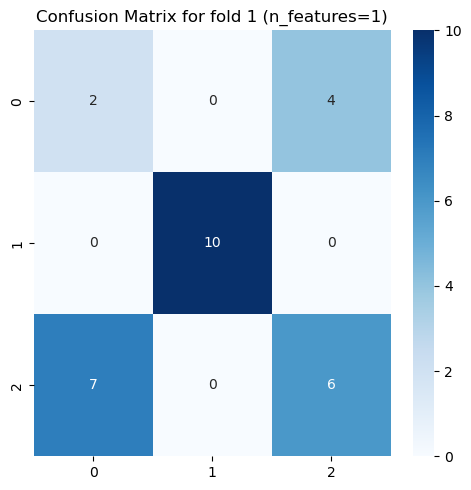

Fold 2: Training data length: 87 | Test data length: 29
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       0.11      0.17      0.13         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.50      0.38      0.43        13

    accuracy                           0.55        29
   macro avg       0.54      0.52      0.52        29
weighted avg       0.59      0.55      0.57        29



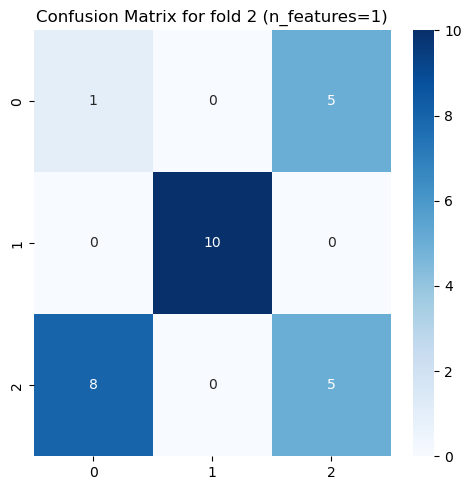

Fold 3: Training data length: 87 | Test data length: 29
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.00      0.00      0.00         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.46      0.50      0.48        12

    accuracy                           0.55        29
   macro avg       0.49      0.50      0.49        29
weighted avg       0.54      0.55      0.54        29



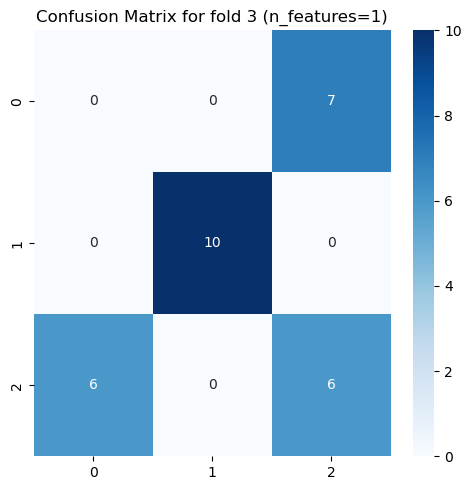

Fold 4: Training data length: 87 | Test data length: 29
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       0.00      0.00      0.00         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.61      0.92      0.73        12

    accuracy                           0.72        29
   macro avg       0.54      0.64      0.58        29
weighted avg       0.60      0.72      0.65        29



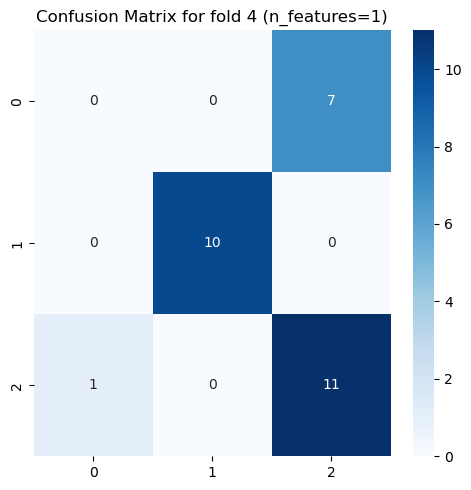

Average accuracy with 1 features: 0.6121
Running RFE with 2 features...
Selected features with 2 features: ['Maximum injection pressure', 'Switch-over volume']
Fold 1: Training data length: 87 | Test data length: 29
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       0.33      0.50      0.40         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.70      0.54      0.61        13

    accuracy                           0.69        29
   macro avg       0.68      0.68      0.67        29
weighted avg       0.73      0.69      0.70        29



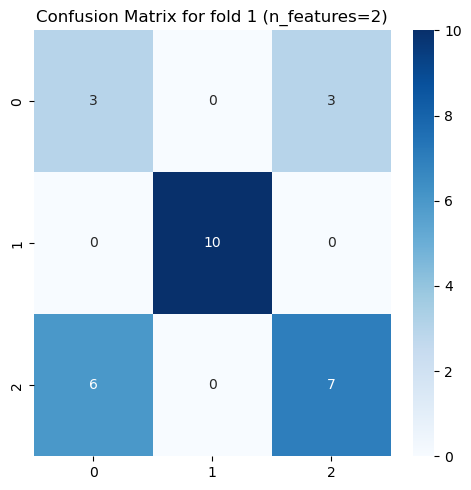

Fold 2: Training data length: 87 | Test data length: 29
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       0.67      0.33      0.44         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.75      0.92      0.83        13

    accuracy                           0.83        29
   macro avg       0.81      0.75      0.76        29
weighted avg       0.82      0.83      0.81        29



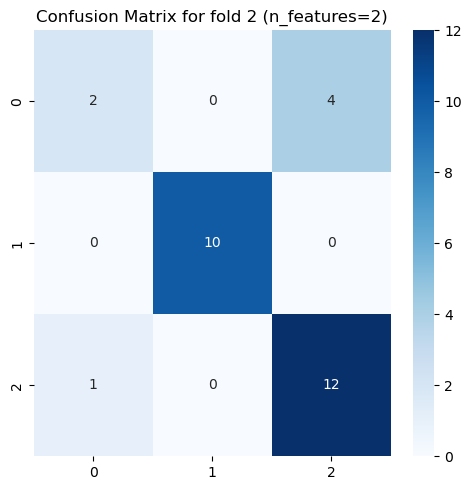

Fold 3: Training data length: 87 | Test data length: 29
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.55      0.86      0.67         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.88      0.58      0.70        12

    accuracy                           0.79        29
   macro avg       0.81      0.81      0.79        29
weighted avg       0.84      0.79      0.80        29



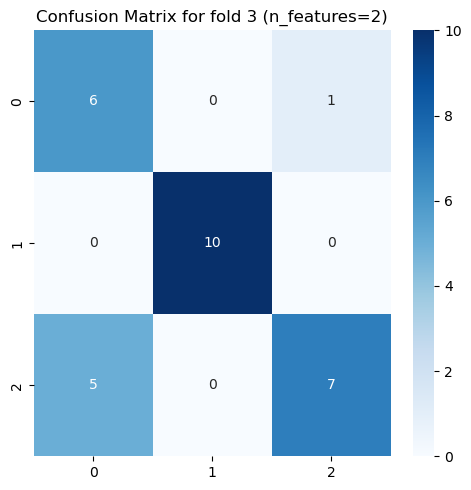

Fold 4: Training data length: 87 | Test data length: 29
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       0.75      0.43      0.55         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.73      0.92      0.81        12

    accuracy                           0.83        29
   macro avg       0.83      0.78      0.79        29
weighted avg       0.83      0.83      0.81        29



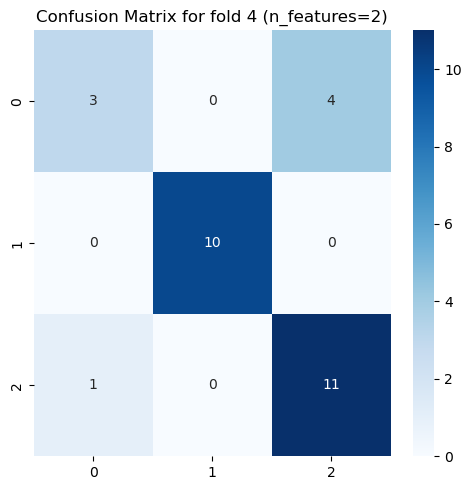

Average accuracy with 2 features: 0.7845
Running RFE with 3 features...
Selected features with 3 features: ['Cylinder heating zone 2', 'Maximum injection pressure', 'Switch-over volume']
Fold 1: Training data length: 87 | Test data length: 29
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       0.62      0.83      0.71         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.91      0.77      0.83        13

    accuracy                           0.86        29
   macro avg       0.84      0.87      0.85        29
weighted avg       0.88      0.86      0.87        29



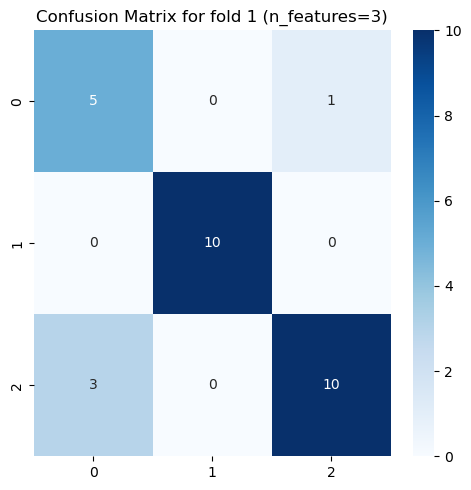

Fold 2: Training data length: 87 | Test data length: 29
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       0.71      0.83      0.77         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      0.85      0.88        13

    accuracy                           0.90        29
   macro avg       0.88      0.89      0.88        29
weighted avg       0.90      0.90      0.90        29



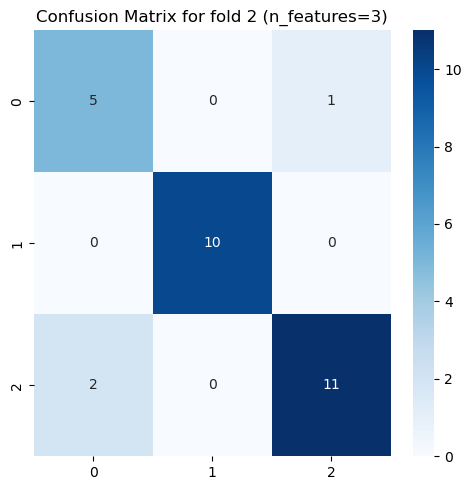

Fold 3: Training data length: 87 | Test data length: 29
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.50      0.71      0.59         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.78      0.58      0.67        12

    accuracy                           0.76        29
   macro avg       0.76      0.77      0.75        29
weighted avg       0.79      0.76      0.76        29



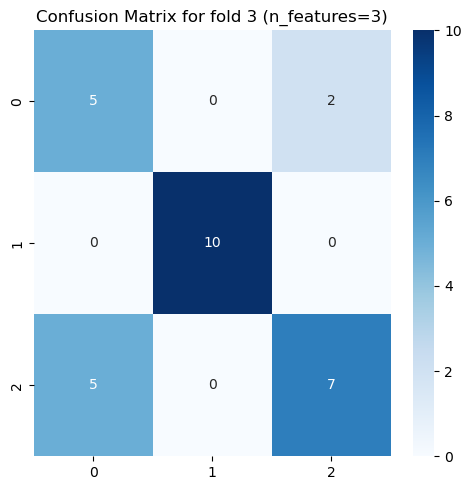

Fold 4: Training data length: 87 | Test data length: 29
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       0.75      0.43      0.55         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.73      0.92      0.81        12

    accuracy                           0.83        29
   macro avg       0.83      0.78      0.79        29
weighted avg       0.83      0.83      0.81        29



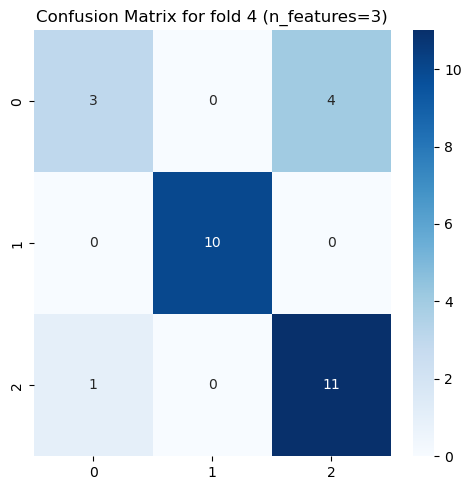

Average accuracy with 3 features: 0.8362
Running RFE with 4 features...
Selected features with 4 features: ['Cylinder heating zone 2', 'Cylinder heating zone 3', 'Maximum injection pressure', 'Switch-over volume']
Fold 1: Training data length: 87 | Test data length: 29
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       0.83      0.83      0.83         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      0.92      0.92        13

    accuracy                           0.93        29
   macro avg       0.92      0.92      0.92        29
weighted avg       0.93      0.93      0.93        29



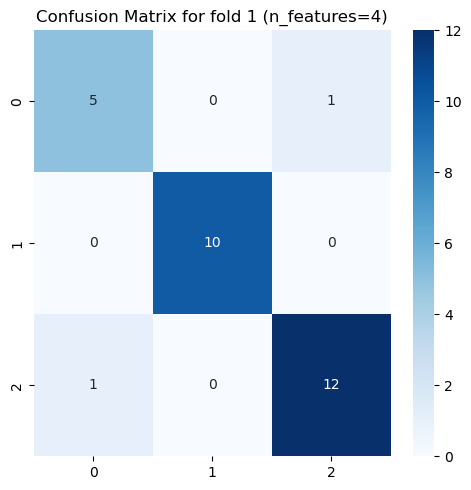

Fold 2: Training data length: 87 | Test data length: 29
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29



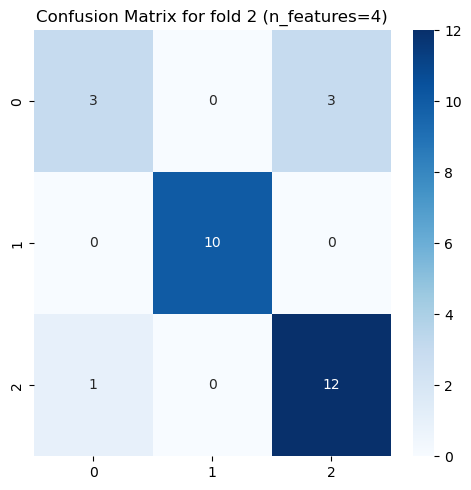

Fold 3: Training data length: 87 | Test data length: 29
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.50      0.43      0.46         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.69      0.75      0.72        12

    accuracy                           0.76        29
   macro avg       0.73      0.73      0.73        29
weighted avg       0.75      0.76      0.75        29



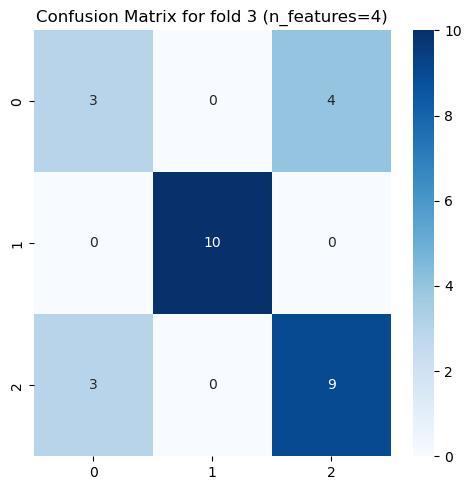

Fold 4: Training data length: 87 | Test data length: 29
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      0.86      0.92         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      1.00      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.96        29



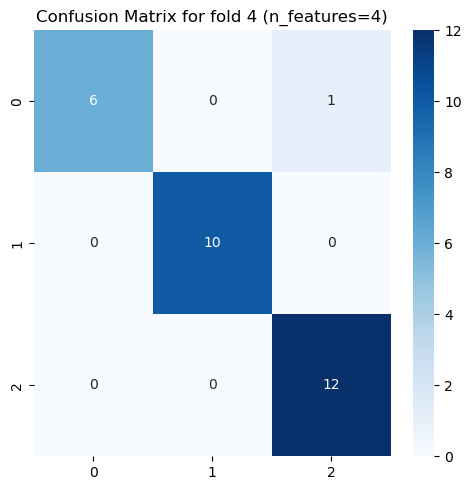

Average accuracy with 4 features: 0.8793
Running RFE with 5 features...
Selected features with 5 features: ['Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Maximum injection pressure', 'Switch-over volume']
Fold 1: Training data length: 87 | Test data length: 29
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       1.00      0.83      0.91         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.93      1.00      0.96        13

    accuracy                           0.97        29
   macro avg       0.98      0.94      0.96        29
weighted avg       0.97      0.97      0.96        29



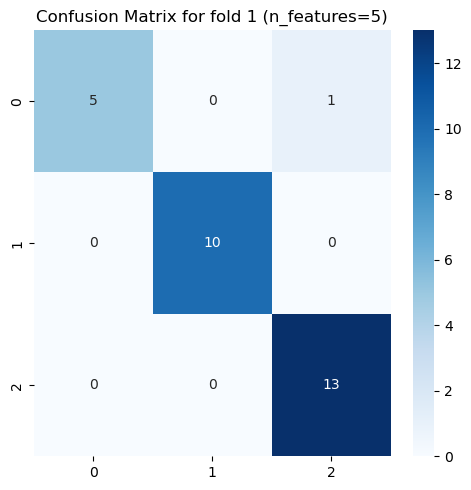

Fold 2: Training data length: 87 | Test data length: 29
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29



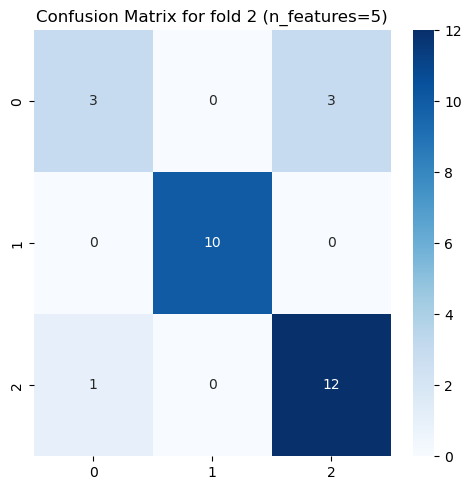

Fold 3: Training data length: 87 | Test data length: 29
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.80      0.57      0.67         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.79      0.92      0.85        12

    accuracy                           0.86        29
   macro avg       0.86      0.83      0.84        29
weighted avg       0.86      0.86      0.86        29



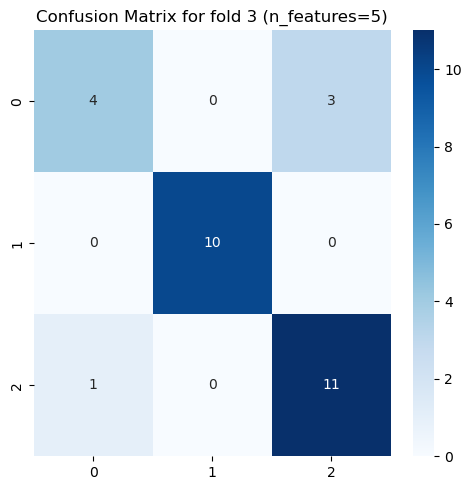

Fold 4: Training data length: 87 | Test data length: 29
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      1.00      1.00         7
  Condition3       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



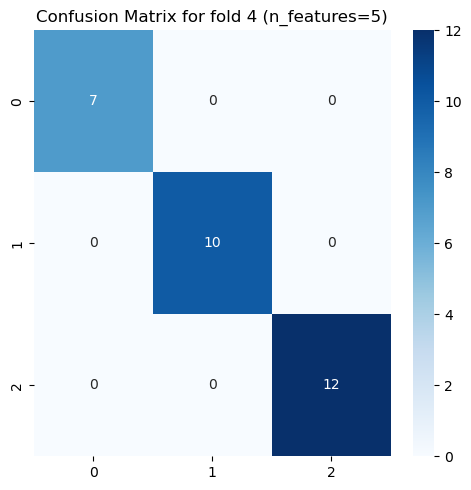

Average accuracy with 5 features: 0.9224
Running RFE with 6 features...
Selected features with 6 features: ['Cylinder heating zone 1', 'Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Maximum injection pressure', 'Switch-over volume']
Fold 1: Training data length: 87 | Test data length: 29
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       1.00      0.67      0.80         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.87      1.00      0.93        13

    accuracy                           0.93        29
   macro avg       0.96      0.89      0.91        29
weighted avg       0.94      0.93      0.93        29



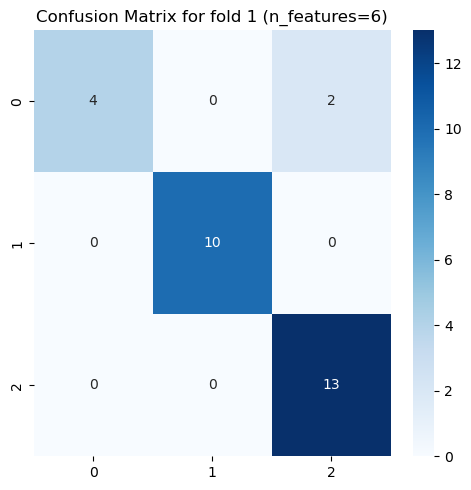

Fold 2: Training data length: 87 | Test data length: 29
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       0.80      0.67      0.73         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.86      0.92      0.89        13

    accuracy                           0.90        29
   macro avg       0.89      0.86      0.87        29
weighted avg       0.89      0.90      0.89        29



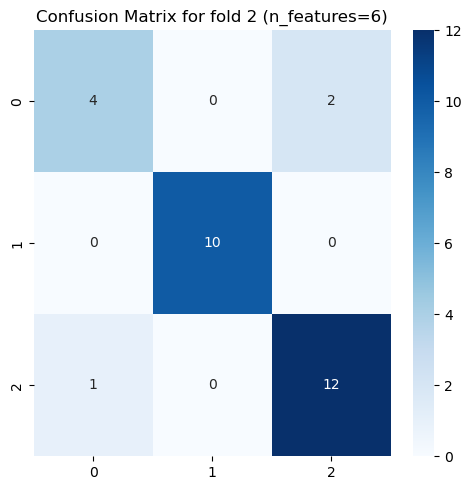

Fold 3: Training data length: 87 | Test data length: 29
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.56      0.71      0.62         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.67      0.73        12

    accuracy                           0.79        29
   macro avg       0.79      0.79      0.78        29
weighted avg       0.81      0.79      0.80        29



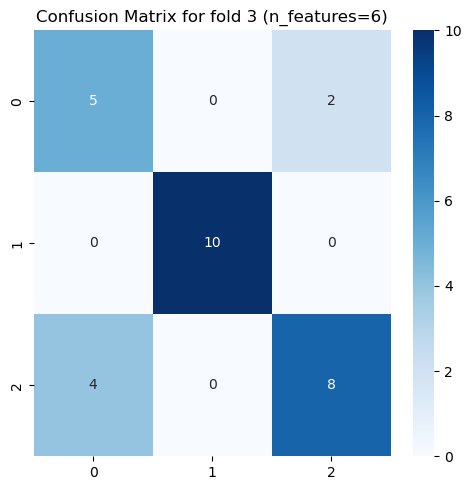

Fold 4: Training data length: 87 | Test data length: 29
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      0.71      0.83         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.86      1.00      0.92        12

    accuracy                           0.93        29
   macro avg       0.95      0.90      0.92        29
weighted avg       0.94      0.93      0.93        29



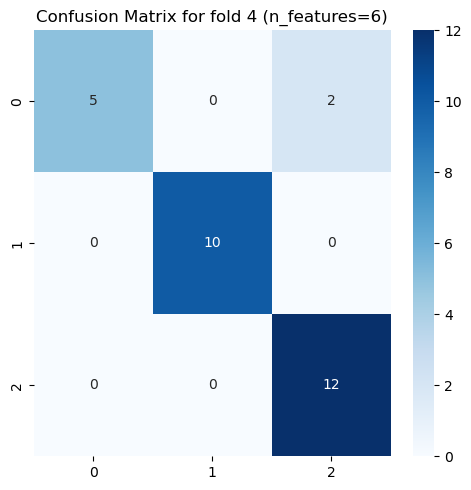

Average accuracy with 6 features: 0.8879
Running RFE with 7 features...
Selected features with 7 features: ['Cylinder heating zone 1', 'Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Maximum injection pressure', 'Switch-over volume', 'Material cushion']
Fold 1: Training data length: 87 | Test data length: 29
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       1.00      0.50      0.67         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.81      1.00      0.90        13

    accuracy                           0.90        29
   macro avg       0.94      0.83      0.85        29
weighted avg       0.92      0.90      0.88        29



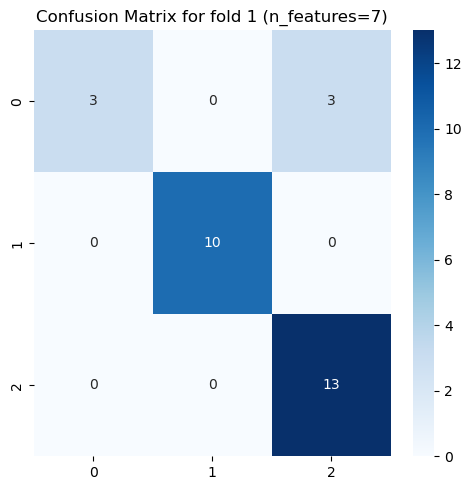

Fold 2: Training data length: 87 | Test data length: 29
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29



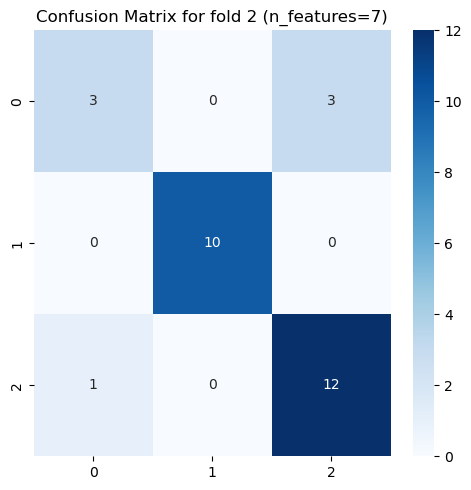

Fold 3: Training data length: 87 | Test data length: 29
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.71      0.71      0.71         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.83      0.83      0.83        12

    accuracy                           0.86        29
   macro avg       0.85      0.85      0.85        29
weighted avg       0.86      0.86      0.86        29



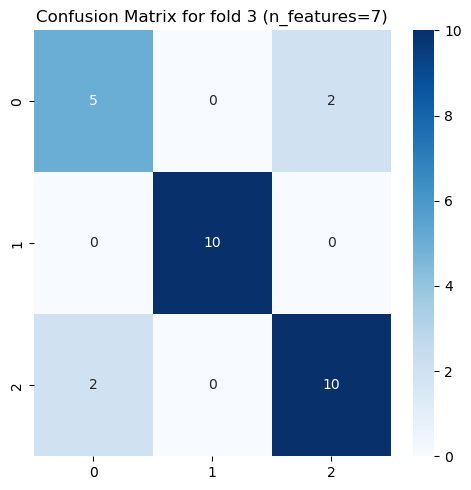

Fold 4: Training data length: 87 | Test data length: 29
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      0.57      0.73         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      1.00      0.89        12

    accuracy                           0.90        29
   macro avg       0.93      0.86      0.87        29
weighted avg       0.92      0.90      0.89        29



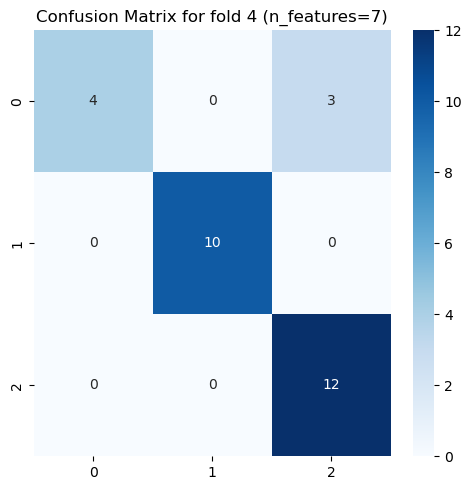

Average accuracy with 7 features: 0.8793
Running RFE with 8 features...
Selected features with 8 features: ['Cylinder heating zone 1', 'Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Maximum injection pressure', 'Dosage time', 'Switch-over volume', 'Material cushion']
Fold 1: Training data length: 87 | Test data length: 29
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29



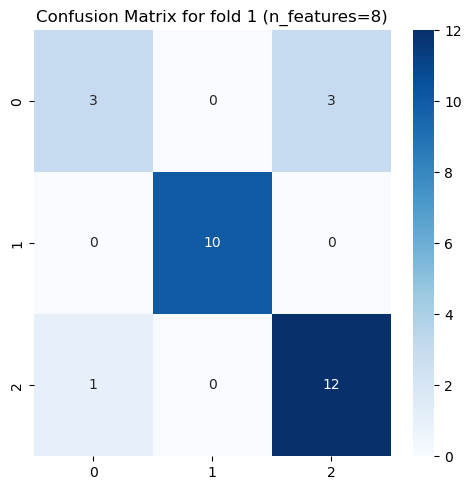

Fold 2: Training data length: 87 | Test data length: 29
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29



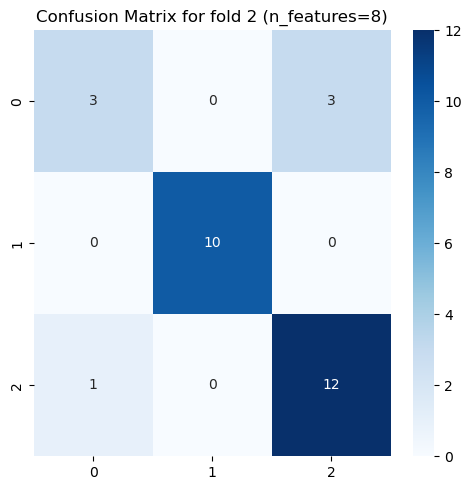

Fold 3: Training data length: 87 | Test data length: 29
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.62      0.71      0.67         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.82      0.75      0.78        12

    accuracy                           0.83        29
   macro avg       0.81      0.82      0.82        29
weighted avg       0.83      0.83      0.83        29



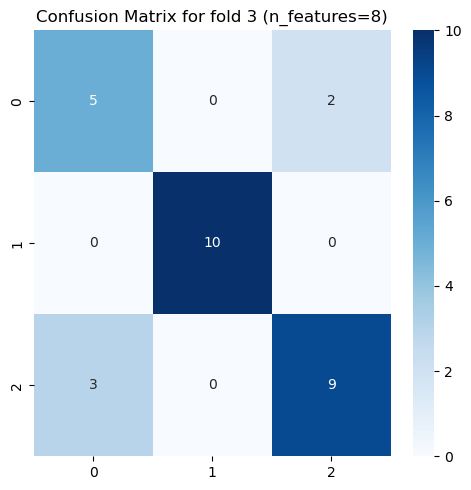

Fold 4: Training data length: 87 | Test data length: 29
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      0.57      0.73         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      1.00      0.89        12

    accuracy                           0.90        29
   macro avg       0.93      0.86      0.87        29
weighted avg       0.92      0.90      0.89        29



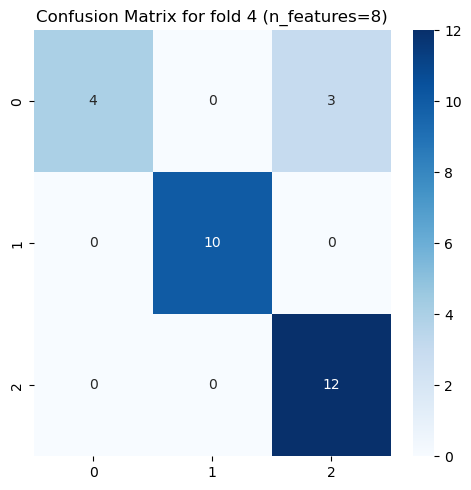

Average accuracy with 8 features: 0.8621
Running RFE with 9 features...
Selected features with 9 features: ['Cylinder heating zone 1', 'Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Maximum injection pressure', 'Dosage time', 'Cycle time', 'Switch-over volume', 'Material cushion']
Fold 1: Training data length: 87 | Test data length: 29
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29



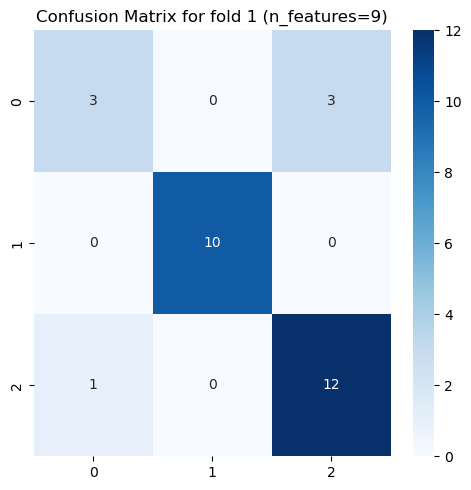

Fold 2: Training data length: 87 | Test data length: 29
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       1.00      0.50      0.67         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.81      1.00      0.90        13

    accuracy                           0.90        29
   macro avg       0.94      0.83      0.85        29
weighted avg       0.92      0.90      0.88        29



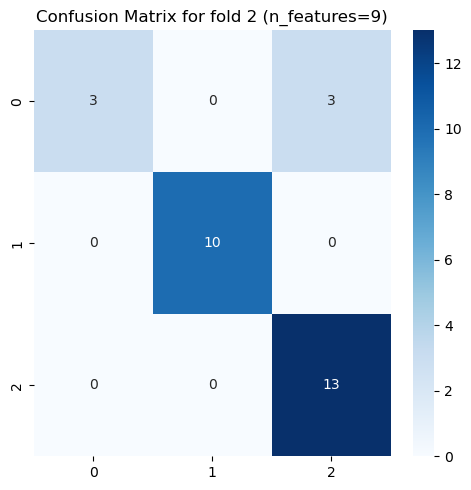

Fold 3: Training data length: 87 | Test data length: 29
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.62      0.71      0.67         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.82      0.75      0.78        12

    accuracy                           0.83        29
   macro avg       0.81      0.82      0.82        29
weighted avg       0.83      0.83      0.83        29



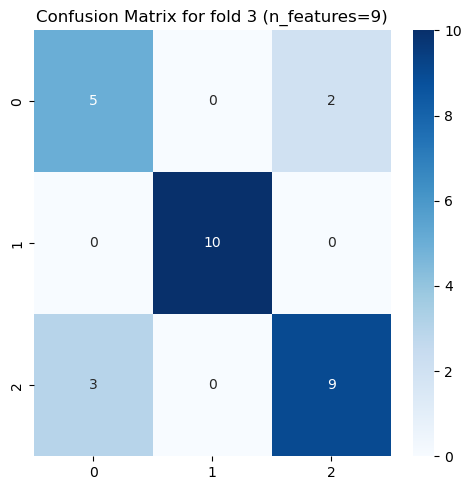

Fold 4: Training data length: 87 | Test data length: 29
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      0.57      0.73         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      1.00      0.89        12

    accuracy                           0.90        29
   macro avg       0.93      0.86      0.87        29
weighted avg       0.92      0.90      0.89        29



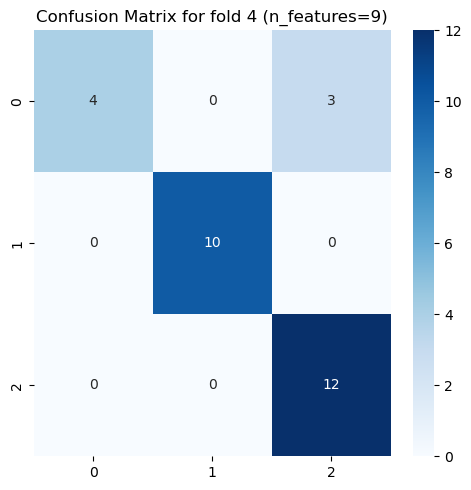

Average accuracy with 9 features: 0.8707
Running RFE with 10 features...
Selected features with 10 features: ['Cylinder heating zone 1', 'Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Maximum injection pressure', 'Injection time', 'Dosage time', 'Cycle time', 'Switch-over volume', 'Material cushion']
Fold 1: Training data length: 87 | Test data length: 29
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29



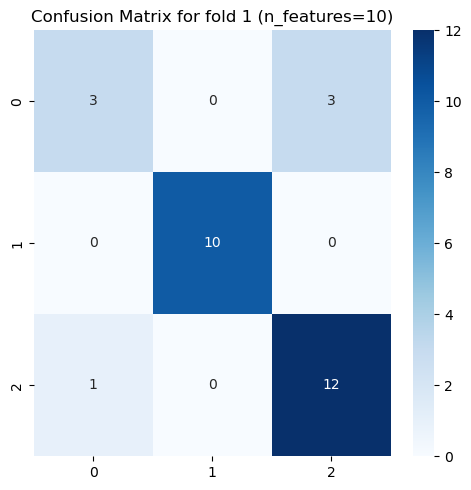

Fold 2: Training data length: 87 | Test data length: 29
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       1.00      0.50      0.67         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.81      1.00      0.90        13

    accuracy                           0.90        29
   macro avg       0.94      0.83      0.85        29
weighted avg       0.92      0.90      0.88        29



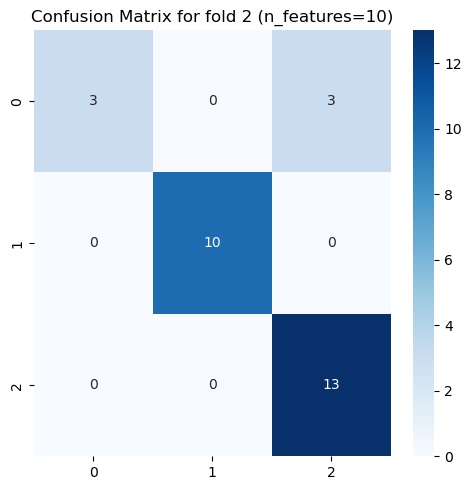

Fold 3: Training data length: 87 | Test data length: 29
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.62      0.71      0.67         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.82      0.75      0.78        12

    accuracy                           0.83        29
   macro avg       0.81      0.82      0.82        29
weighted avg       0.83      0.83      0.83        29



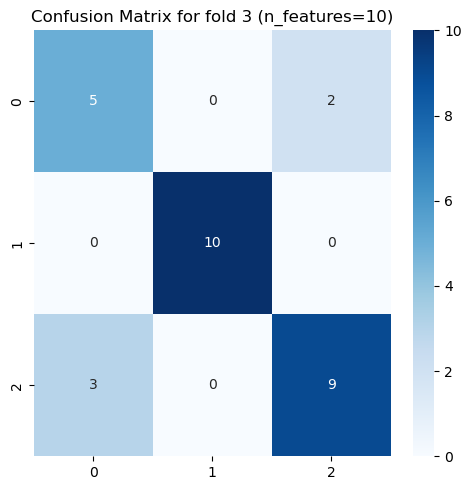

Fold 4: Training data length: 87 | Test data length: 29
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      0.57      0.73         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      1.00      0.89        12

    accuracy                           0.90        29
   macro avg       0.93      0.86      0.87        29
weighted avg       0.92      0.90      0.89        29



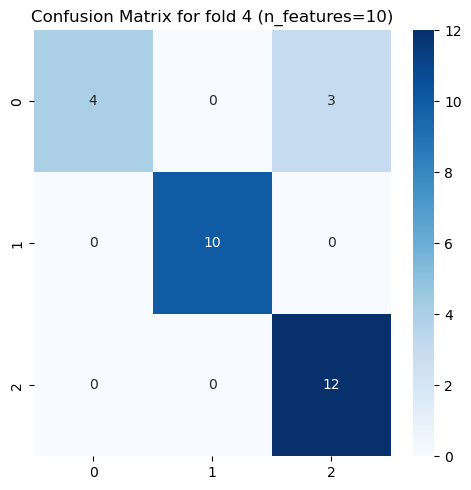

Average accuracy with 10 features: 0.8707
Running RFE with 11 features...
Selected features with 11 features: ['Cylinder heating zone 1', 'Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Mould temperature control unit 1', 'Maximum injection pressure', 'Injection time', 'Dosage time', 'Cycle time', 'Switch-over volume', 'Material cushion']
Fold 1: Training data length: 87 | Test data length: 29
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29



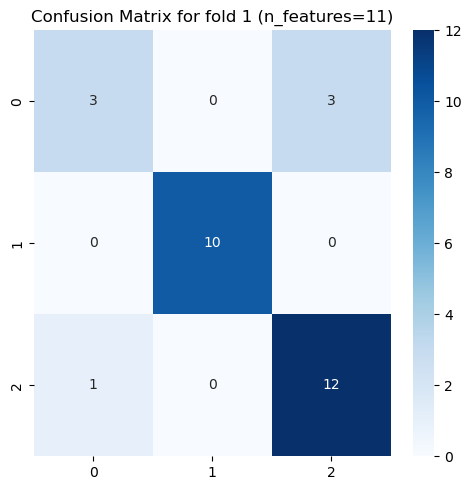

Fold 2: Training data length: 87 | Test data length: 29
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       1.00      0.50      0.67         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.81      1.00      0.90        13

    accuracy                           0.90        29
   macro avg       0.94      0.83      0.85        29
weighted avg       0.92      0.90      0.88        29



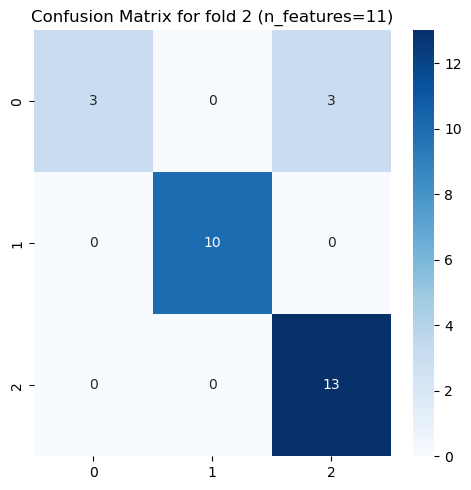

Fold 3: Training data length: 87 | Test data length: 29
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.62      0.71      0.67         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.82      0.75      0.78        12

    accuracy                           0.83        29
   macro avg       0.81      0.82      0.82        29
weighted avg       0.83      0.83      0.83        29



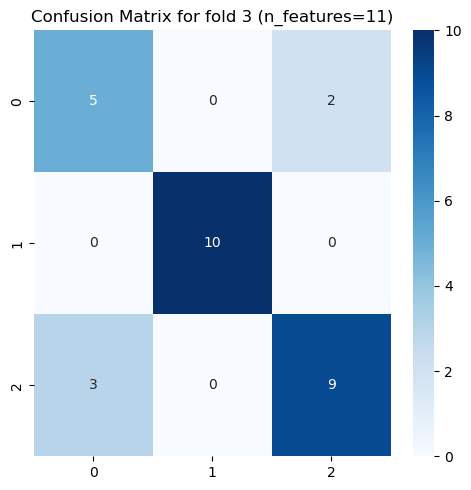

Fold 4: Training data length: 87 | Test data length: 29
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      0.57      0.73         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      1.00      0.89        12

    accuracy                           0.90        29
   macro avg       0.93      0.86      0.87        29
weighted avg       0.92      0.90      0.89        29



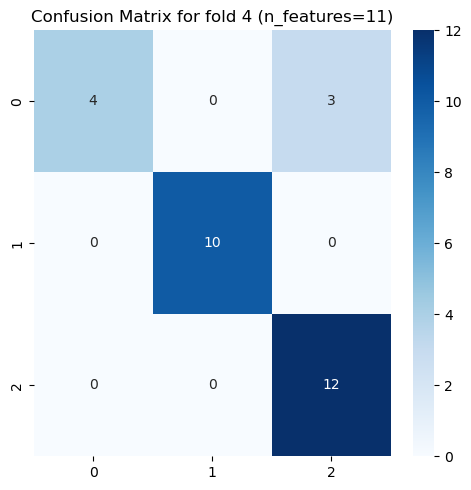

Average accuracy with 11 features: 0.8707
Running RFE with 12 features...
Selected features with 12 features: ['Cylinder heating zone 1', 'Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Cylinder heating zone 5', 'Mould temperature control unit 1', 'Maximum injection pressure', 'Injection time', 'Dosage time', 'Cycle time', 'Switch-over volume', 'Material cushion']
Fold 1: Training data length: 87 | Test data length: 29
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29



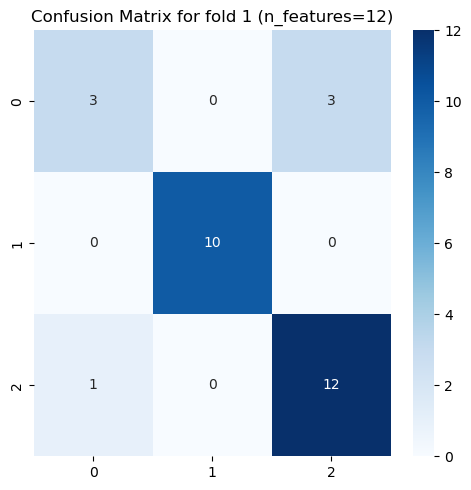

Fold 2: Training data length: 87 | Test data length: 29
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       1.00      0.50      0.67         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.81      1.00      0.90        13

    accuracy                           0.90        29
   macro avg       0.94      0.83      0.85        29
weighted avg       0.92      0.90      0.88        29



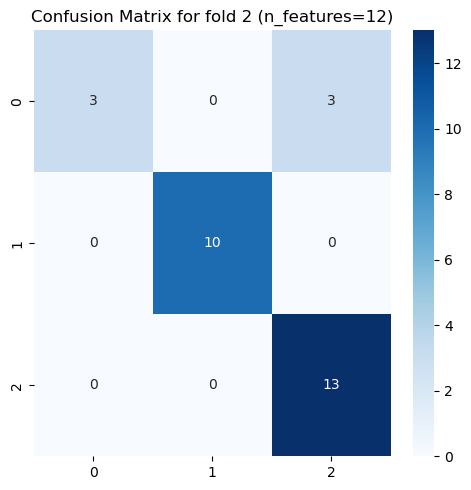

Fold 3: Training data length: 87 | Test data length: 29
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.80      0.57      0.67         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.79      0.92      0.85        12

    accuracy                           0.86        29
   macro avg       0.86      0.83      0.84        29
weighted avg       0.86      0.86      0.86        29



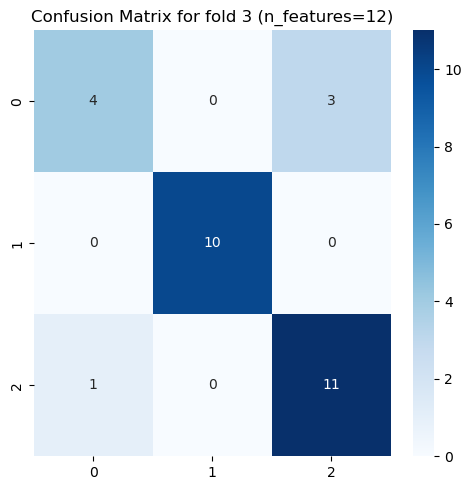

Fold 4: Training data length: 87 | Test data length: 29
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      0.71      0.83         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.86      1.00      0.92        12

    accuracy                           0.93        29
   macro avg       0.95      0.90      0.92        29
weighted avg       0.94      0.93      0.93        29



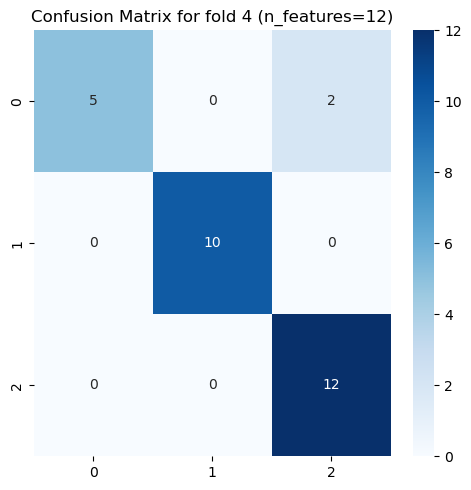

Average accuracy with 12 features: 0.8879
The best number of features: 5 with accuracy: 0.9224


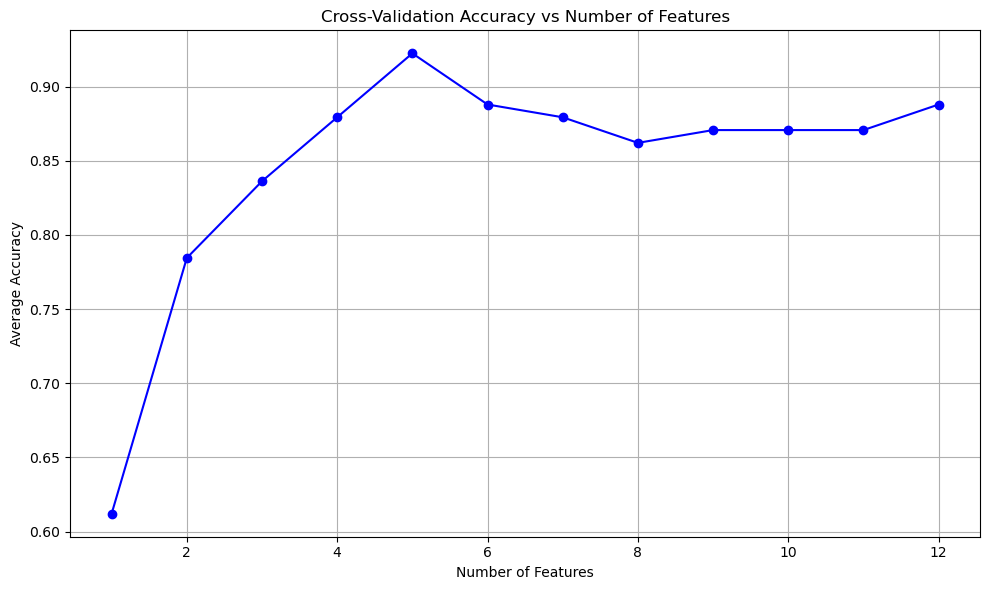

Best selected features: ['Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Maximum injection pressure', 'Switch-over volume']


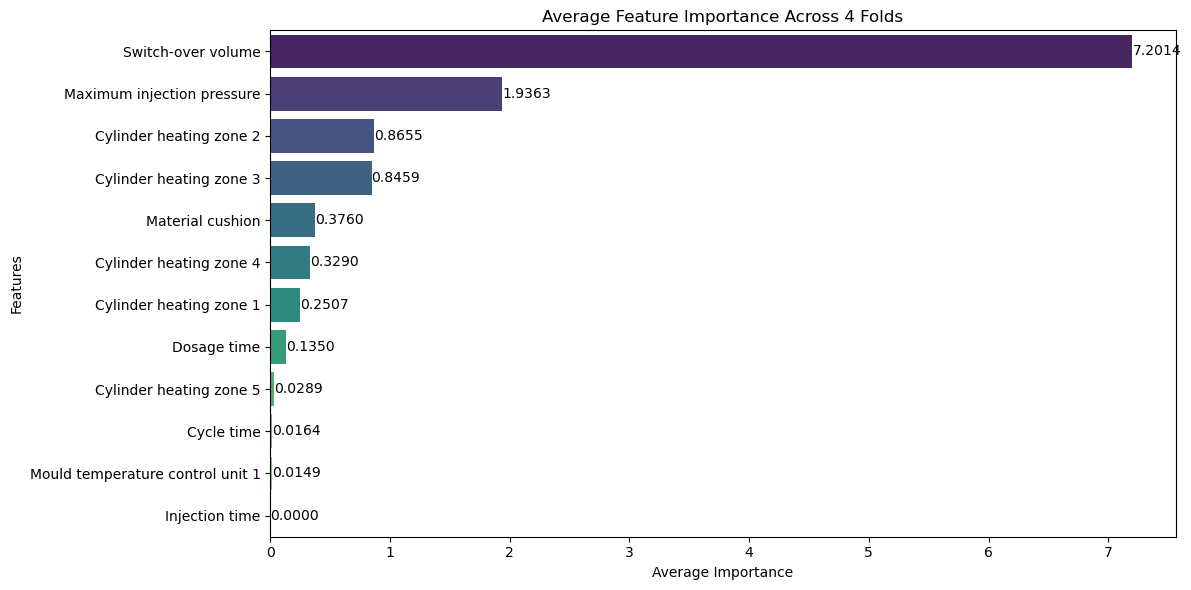

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE

# Load your data (X and y) from previous step
# Assuming X and y have already been split from the dataset

# Define decision model
model_name = 'Decision Tree'
base_model = DecisionTreeClassifier(random_state=0)

# Split data into 4 folds using StratifiedKFold
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Define a save path for results (ensure the directory exists)
savePath = r"C:\path\to\save\results"
if not os.path.exists(savePath):
    os.makedirs(savePath)

# Set up a list to track cross-validation scores for each number of features
cv_scores = []

# Dictionary to track feature importances across folds
feature_importances = np.zeros(X.shape[1])  # To accumulate feature importance scores

# Loop through different numbers of features to select
for n_features in range(1, X.shape[1] + 1):  # From 1 feature to the total number of features
    print(f"Running RFE with {n_features} features...")
    
    # Apply RFE with the current number of features
    rfe = RFE(estimator=base_model, n_features_to_select=n_features)
    rfe.fit(X, y)
    
    # Select the features based on the RFE result
    selected_features = X.columns[rfe.support_].tolist()
    print(f"Selected features with {n_features} features:", selected_features)
    
    # Evaluate performance using cross-validation with the selected features
    accuracy_list = []
    fold_feature_importances = np.zeros(X.shape[1])  # Track feature importance for this fold
    
    for fold, (train_idx, test_idx) in enumerate(cv.split(X[selected_features], y), 1):
        X_train = X[selected_features].iloc[train_idx]
        X_test = X[selected_features].iloc[test_idx]
        y_train = y.iloc[train_idx]
        y_test = y.iloc[test_idx]
        
        # Print the length of training and test data
        print(f"Fold {fold}: Training data length: {len(X_train)} | Test data length: {len(X_test)}")
        
        # Fit the decision tree model and predict
        base_model.fit(X_train, y_train)
        y_pred = base_model.predict(X_test)
        
        # Calculate accuracy and append to list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list.append(accuracy)
        
        # Get the feature importances for this fold (only for the selected features)
        fold_feature_importances[rfe.support_] += base_model.feature_importances_
        
        # Display classification report
        print(f"Classification Report for fold {fold}:\n", classification_report(y_test, y_pred))
        
        # Plot and save confusion matrix
        fig, ax = plt.subplots(figsize=(5, 5))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax)
        plt.title(f'Confusion Matrix for fold {fold} (n_features={n_features})')
        plt.tight_layout()
        plt.savefig(os.path.join(savePath, f'confusion_matrix_{n_features}_fold_{fold}.png'))
        plt.show()
    
    # Average accuracy for this number of features
    avg_accuracy = np.mean(accuracy_list)
    print(f"Average accuracy with {n_features} features: {avg_accuracy:.4f}")
    
    # Store the average accuracy for this number of features
    cv_scores.append((n_features, avg_accuracy))

    # Accumulate the fold feature importances for this set of selected features
    feature_importances += fold_feature_importances

# Find the number of features with the highest cross-validation score
best_n_features, best_accuracy = max(cv_scores, key=lambda x: x[1])
print(f"The best number of features: {best_n_features} with accuracy: {best_accuracy:.4f}")

# Plot the cross-validation accuracy vs number of features
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in cv_scores], [x[1] for x in cv_scores], marker='o', color='b')
plt.title("Cross-Validation Accuracy vs Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Average Accuracy")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(savePath, 'cv_accuracy_vs_features.png'))
plt.show()

# Final result: Use the best number of features found
best_rfe = RFE(estimator=base_model, n_features_to_select=best_n_features)
best_rfe.fit(X, y)

# Selected best features
best_selected_features = X.columns[best_rfe.support_].tolist()
print(f"Best selected features: {best_selected_features}")

# Normalize feature importances by dividing by the number of folds (to get average importance)
feature_importances /= cv.get_n_splits()

# Create a DataFrame to store feature importances for sorting and visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance bar chart (vertical)
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Add importance score labels on top of the bars
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', color='black', ha="left", va="center")

# Add titles and labels
plt.title(f"Average Feature Importance Across {cv.get_n_splits()} Folds")
plt.xlabel("Average Importance")
plt.ylabel("Features")
plt.tight_layout()

# Save and show the plot
plt.savefig(os.path.join(savePath, 'average_feature_importance_sorted_vertical.png'))
plt.show()


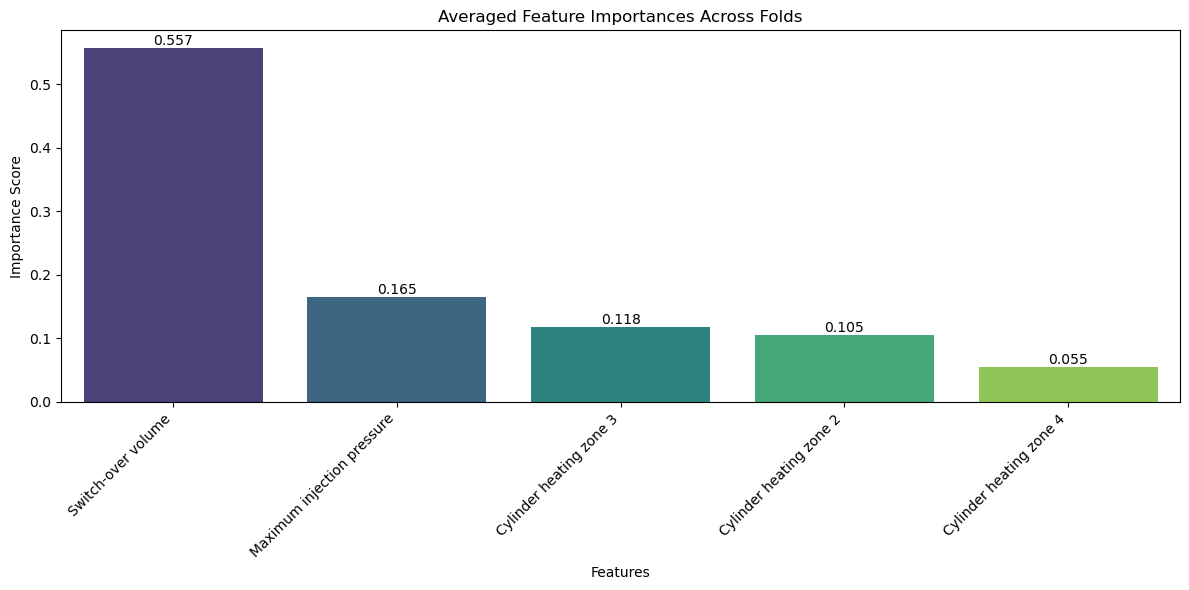

Number of selected features based on importance: 5
Selected features based on importance: ['Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Maximum injection pressure', 'Switch-over volume']
Fitting 4 folds for each of 2736 candidates, totalling 10944 fits
GridSearchCV execution time: 124.65 seconds
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from sklearn.model_selection import StratifiedKFold as sk, GridSearchCV
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs, confusion_matrix, classification_report

# Load your data (X and y) from previous step
# Assuming X and y have already been split from the dataset

# Define decision model
model_name = 'Decision Tree'
model2 = dt(random_state=0)

# Best selected features from Code 1 (from RFE)
selected_features = ['Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 
                     'Maximum injection pressure', 'Switch-over volume']

# Split data into 3/4 for training and 1/4 for testing using StratifiedKFold
cv = sk(n_splits=4, shuffle=True, random_state=0)

# Accuracy list for selected features
accuracy_l_selected = []

# List to store feature importances from each fold
all_importances = []

# Define a save path for results (ensure the directory exists)
savePath = r"C:\path\to\save\results"

# Ensure the directory exists, if not, create it
if not os.path.exists(savePath):
    os.makedirs(savePath)

# Perform cross-validation to calculate feature importance across all folds
for tr_i, te_i in cv.split(X[selected_features], y):
    X_tr = X[selected_features].iloc[tr_i]
    X_v = X[selected_features].iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    # Fit decision tree model and predict
    model2.fit(X_tr, y_tr)
    
    # Store feature importances for this fold
    all_importances.append(model2.feature_importances_)

# Average the importances across folds
avg_importances = np.mean(all_importances, axis=0)

# Create DataFrame for averaged importances
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': avg_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot with features on the x-axis and importance on the y-axis for a vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')
plt.title("Averaged Feature Importances Across Folds")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()

# Add value labels on bars
for index, value in enumerate(importance_df['Importance']):
    plt.text(index, value, f"{value:.3f}", ha='center', va='bottom')

# Save the bar chart
plt.savefig(os.path.join(savePath, 'averaged_feature_importances.png'))
plt.show()

# Print the number of selected features
print(f"Number of selected features based on importance: {len(selected_features)}")
print("Selected features based on importance:", selected_features)

# Define hyperparameter grid for tuning
model_params = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1, 20),
    "min_samples_split": range(2, 10),  # Starting from 2 as 1 would result in no splitting
    "min_samples_leaf": range(1, 10)
}

# Start timing the process
start_time = time.time()

# Perform GridSearchCV with the selected features
grid_search = GridSearchCV(estimator=model2, param_grid=model_params, cv=cv, n_jobs=-1, verbose=1)
grid_search.fit(X[selected_features], y)

# End timing the process
end_time = time.time()
execution_time = end_time - start_time
print(f"GridSearchCV execution time: {execution_time:.2f} seconds")

# Best hyperparameters from GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")



Training data length: 87 | Test data length: 29
Training data length: 87 | Test data length: 29
Training data length: 87 | Test data length: 29
Training data length: 87 | Test data length: 29


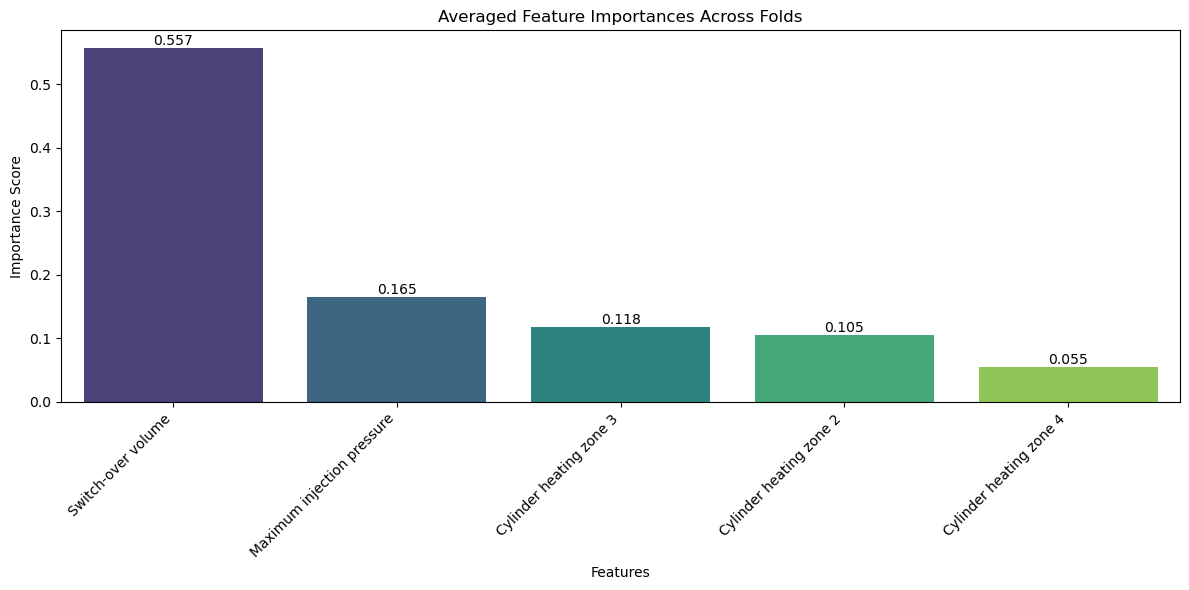

Fold 1 - Training data length: 87 | Test data length: 29
Accuracy for fold 1: 0.9655
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       1.00      0.83      0.91         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.93      1.00      0.96        13

    accuracy                           0.97        29
   macro avg       0.98      0.94      0.96        29
weighted avg       0.97      0.97      0.96        29



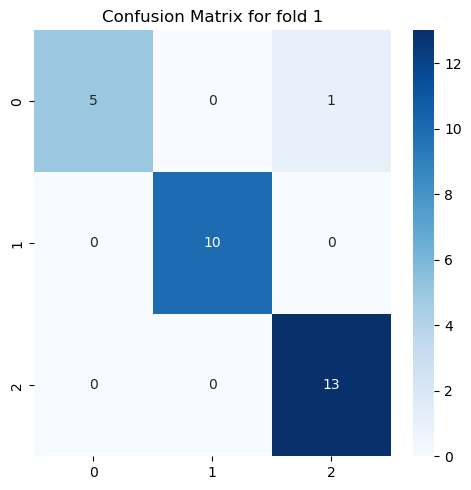

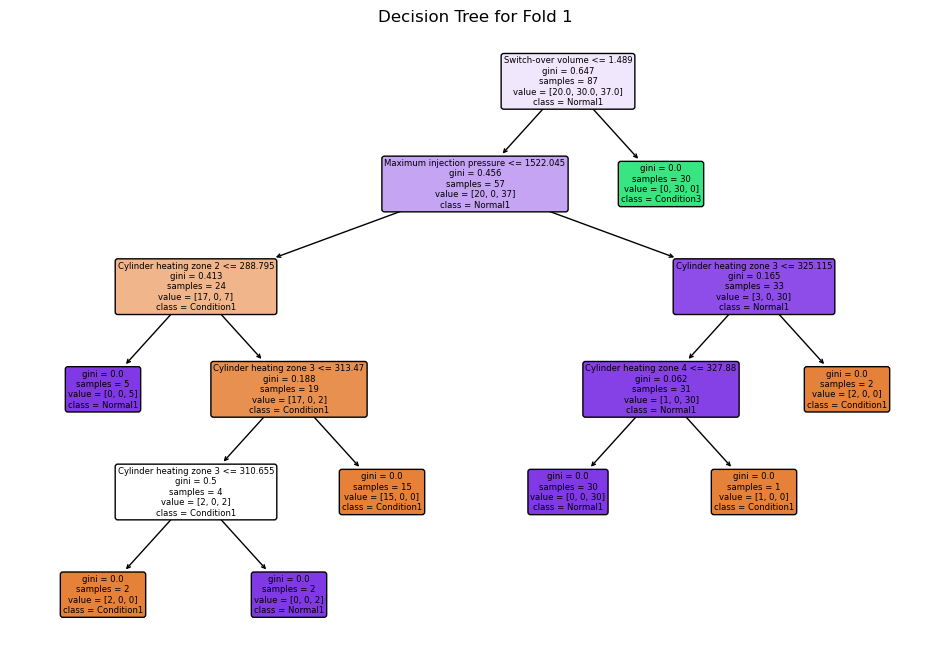

Fold 2 - Training data length: 87 | Test data length: 29
Accuracy for fold 2: 0.8621
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29



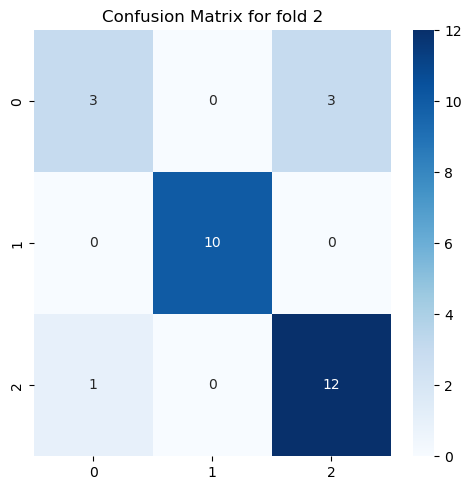

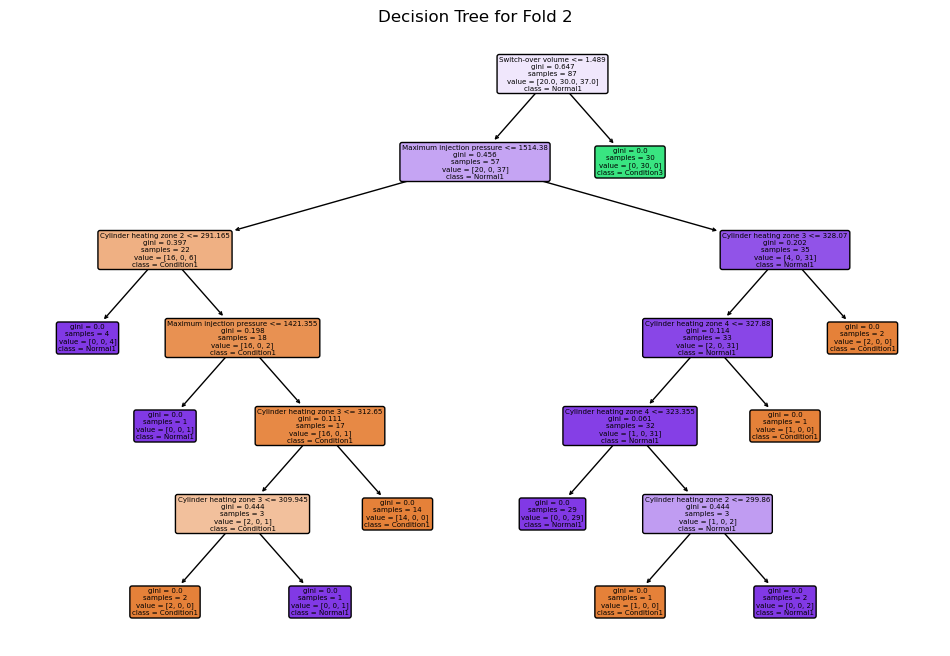

Fold 3 - Training data length: 87 | Test data length: 29
Accuracy for fold 3: 0.8621
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.80      0.57      0.67         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.79      0.92      0.85        12

    accuracy                           0.86        29
   macro avg       0.86      0.83      0.84        29
weighted avg       0.86      0.86      0.86        29



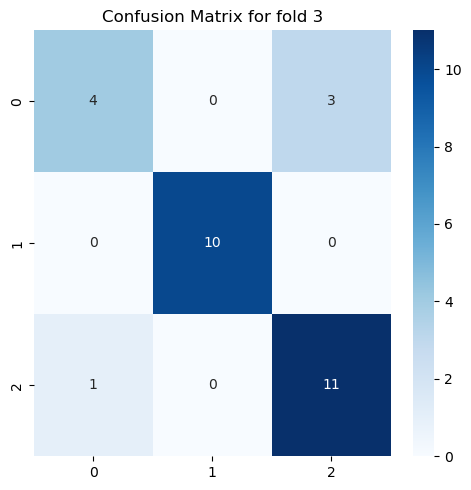

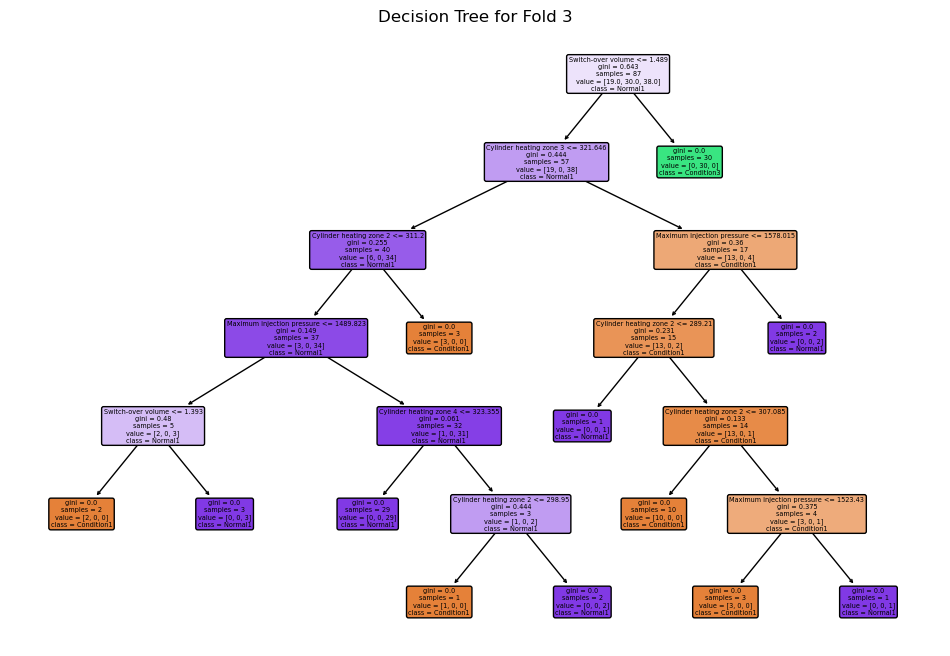

Fold 4 - Training data length: 87 | Test data length: 29
Accuracy for fold 4: 1.0
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      1.00      1.00         7
  Condition3       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



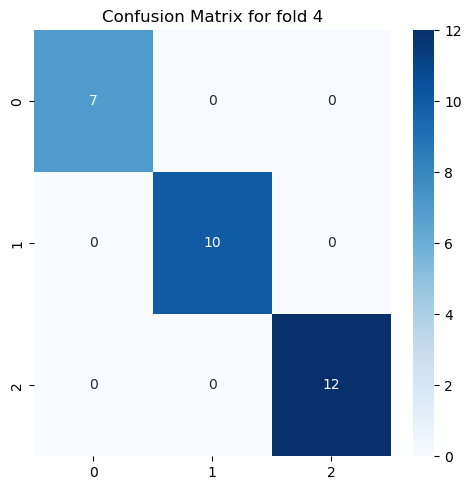

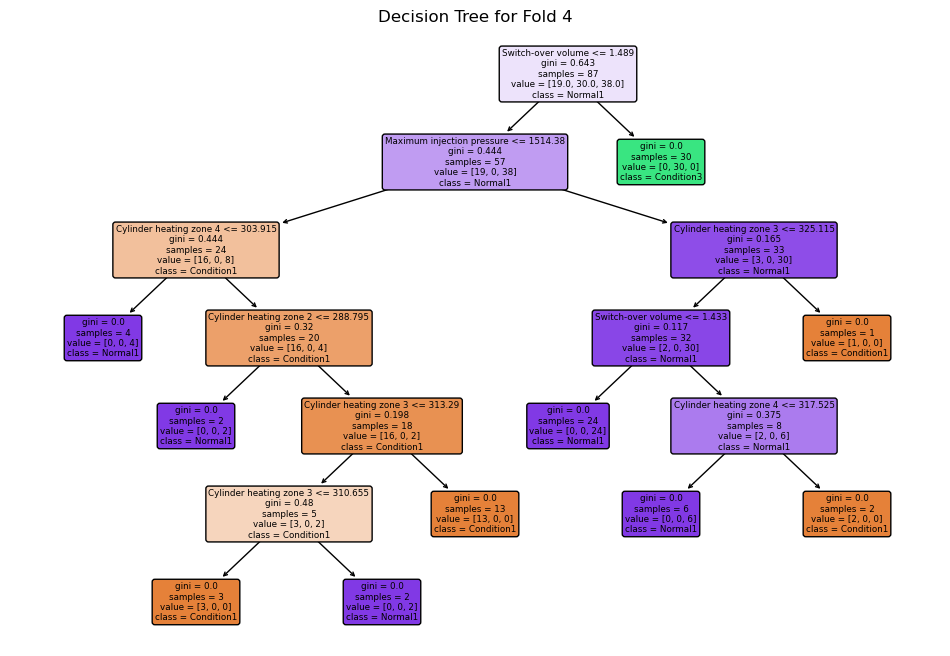

Average accuracy across folds: 0.9224


In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs, confusion_matrix, classification_report
from sklearn import tree

# Load your data (X and y) from previous step
# Assuming X and y have already been split from the dataset

# Best hyperparameters from Code 1
model2 = dt(criterion='gini', max_depth=6, min_samples_leaf=1, min_samples_split=2, random_state=0)

# Features selected based on the result from Code 1
selected_features = ['Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 
                     'Maximum injection pressure', 'Switch-over volume']

# Split data into 4 folds for training and testing using StratifiedKFold
cv = sk(n_splits=4, shuffle=True, random_state=0)

# Accuracy list for selected features
accuracy_l_selected = []

# Define a save path for results (ensure the directory exists)
savePath = r"C:\path\to\save\results"

# Ensure the directory exists, if not, create it
if not os.path.exists(savePath):
    os.makedirs(savePath)

# List to store feature importances from each fold
all_importances = []

# Perform cross-validation to calculate feature importance across all folds
for tr_i, te_i in cv.split(X[selected_features], y):
    X_tr = X[selected_features].iloc[tr_i]
    X_v = X[selected_features].iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    # Print the length of training and test data
    print(f"Training data length: {len(X_tr)} | Test data length: {len(X_v)}")
    
    # Fit decision tree model with the specified hyperparameters
    model2.fit(X_tr, y_tr)
    
    # Store feature importances for this fold
    all_importances.append(model2.feature_importances_)

# Average the importances across folds
avg_importances = np.mean(all_importances, axis=0)

# Create DataFrame for averaged importances
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': avg_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot with features on the x-axis and importance on the y-axis for a vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')
plt.title("Averaged Feature Importances Across Folds")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()

# Add value labels on bars
for index, value in enumerate(importance_df['Importance']):
    plt.text(index, value, f"{value:.3f}", ha='center', va='bottom')

# Save the bar chart
plt.savefig(os.path.join(savePath, 'averaged_feature_importances.png'))
plt.show()

# Initialize list to track accuracy for each fold
accuracy_l_selected = []

# Perform cross-validation with the specified hyperparameters and selected features
for fold, (tr_i, te_i) in enumerate(cv.split(X[selected_features], y), 1):
    X_tr = X[selected_features].iloc[tr_i]
    X_v = X[selected_features].iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    # Print the length of training and test data for each fold
    print(f"Fold {fold} - Training data length: {len(X_tr)} | Test data length: {len(X_v)}")
    
    # Fit decision tree model and predict
    model2.fit(X_tr, y_tr)
    y_p = model2.predict(X_v)
    
    # Calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print(f"Accuracy for fold {fold}: {accuracy.round(4)}")
    accuracy_l_selected.append(accuracy)
    
    # Display classification report
    print(f"Classification Report for fold {fold}:\n", classification_report(y_v, y_p))
    
    # Use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for fold {fold}')
    plt.tight_layout()
    plt.savefig(os.path.join(savePath, f'confusion_matrix_selected_{fold}.png'))
    plt.show()
    
    # Plot the decision tree model for the fold
    plt.figure(figsize=(12, 8))
    tree.plot_tree(model2, filled=True, feature_names=selected_features, class_names=model2.classes_.astype(str), rounded=True)
    plt.title(f"Decision Tree for Fold {fold}")
    plt.savefig(os.path.join(savePath, f'decision_tree_fold_{fold}.png'))
    plt.show()

# Print final accuracy statistics across folds
mean_accuracy = np.mean(accuracy_l_selected)
print("Average accuracy across folds:", mean_accuracy.round(4))


In [102]:
from sklearn.model_selection import RandomizedSearchCV
import os 
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from sklearn import tree
from scipy.stats import randint
import time

# Load data
data = pd.read_csv("cleaneddata.csv")

# Split the data into features (X) and target (y)
# Assuming 'Condition' is the target column and the rest are features
X = data.drop(columns=['Condition'])  # Features
y = data['Condition']  # Target

# Convert X and y to DataFrames
X = pd.DataFrame(X)
y = pd.DataFrame(y)

# Print the length of the data
print("Data length:", len(y))

Data length: 116


In [154]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import StratifiedKFold as sk, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from scipy.stats import randint

# Load your data (X and y) from previous step
# Assuming X and y have already been split from the dataset

# Define decision tree model
model_name = 'Decision Tree'
model2 = dt(random_state=0)

# Best selected features from Code 1
selected_features = ['Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 
                     'Maximum injection pressure', 'Switch-over volume']

# Define hyperparameter space for RandomizedSearchCV
model_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 50),  # Randomized range for max_depth
    'min_samples_split': randint(2, 50),  # Randomized range for min_samples_split
    'min_samples_leaf': randint(1, 50)  # Randomized range for min_samples_leaf
}

# Setup 4-fold cross-validation
cv = sk(n_splits=4, shuffle=True, random_state=0)

# Initialize RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=model2, param_distributions=model_params, n_iter=100, cv=cv, random_state=0, n_jobs=-1)

# Record start time of RandomizedSearchCV execution
start_time = time.time()

# Perform the hyperparameter tuning on the entire dataset (you may want to use X[selected_features] if you've already selected features)
random_search.fit(X[selected_features], y)

# Record end time and calculate execution time
end_time = time.time()
execution_time = end_time - start_time

# Display only the best hyperparameters found
print("Best Hyperparameters found using RandomizedSearchCV:")
print(random_search.best_params_)

# Display the number of selected features based on importance
print(f"Number of selected features based on importance: {len(selected_features)}")

# Display the selected features based on importance
print("Selected features based on importance:", selected_features)

# Show the fitting process status
print(f"Fitting {cv.get_n_splits()} folds for each of {random_search.n_iter} candidates, totalling {random_search.n_iter * cv.get_n_splits()} fits")

# Show RandomizedSearchCV execution time
print(f"RandomizedSearchCV execution time: {execution_time:.4f} seconds")





Best Hyperparameters found using RandomizedSearchCV:
{'criterion': 'gini', 'max_depth': 48, 'min_samples_leaf': 1, 'min_samples_split': 5}
Number of selected features based on importance: 5
Selected features based on importance: ['Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Maximum injection pressure', 'Switch-over volume']
Fitting 4 folds for each of 100 candidates, totalling 400 fits
RandomizedSearchCV execution time: 29.7628 seconds


Training data length: 87 | Test data length: 29
Training data length: 87 | Test data length: 29
Training data length: 87 | Test data length: 29
Training data length: 87 | Test data length: 29


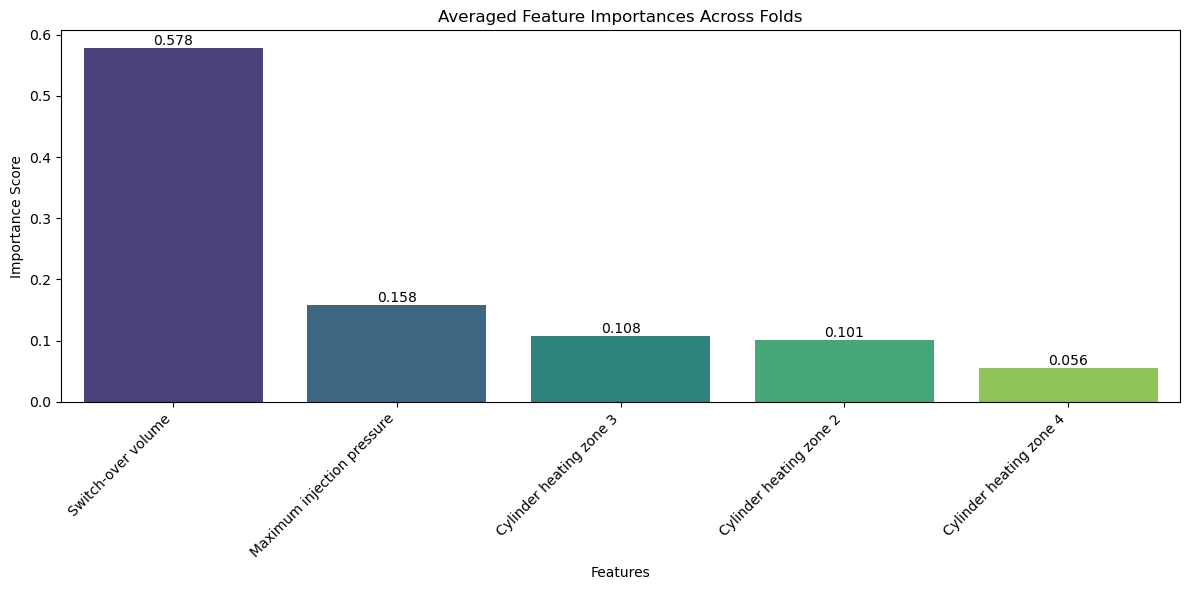

Fold 1 - Training data length: 87 | Test data length: 29
Accuracy for fold 1: 0.8966
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       0.71      0.83      0.77         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      0.85      0.88        13

    accuracy                           0.90        29
   macro avg       0.88      0.89      0.88        29
weighted avg       0.90      0.90      0.90        29



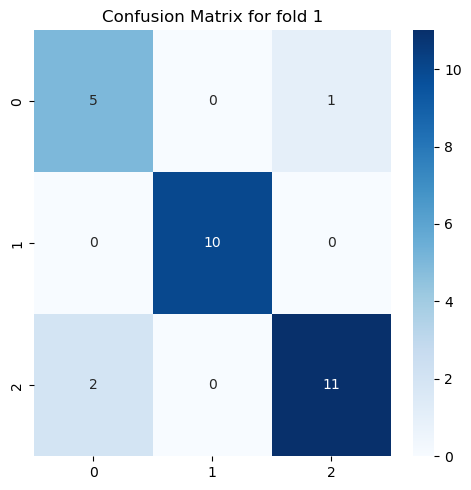

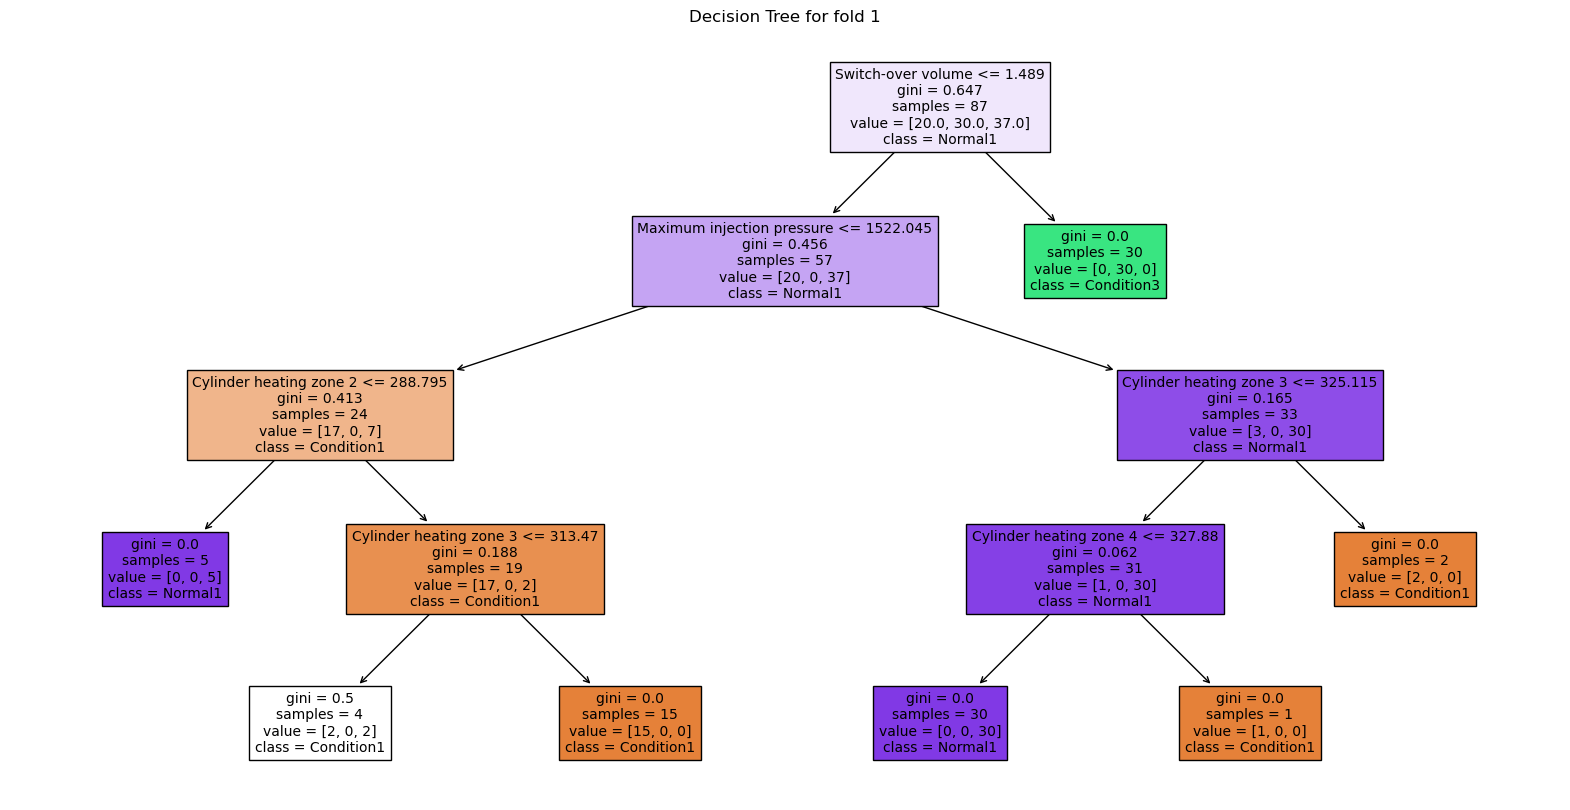

Fold 2 - Training data length: 87 | Test data length: 29
Accuracy for fold 2: 0.8621
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29



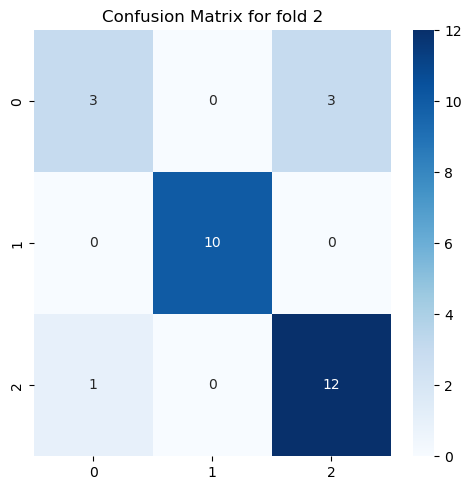

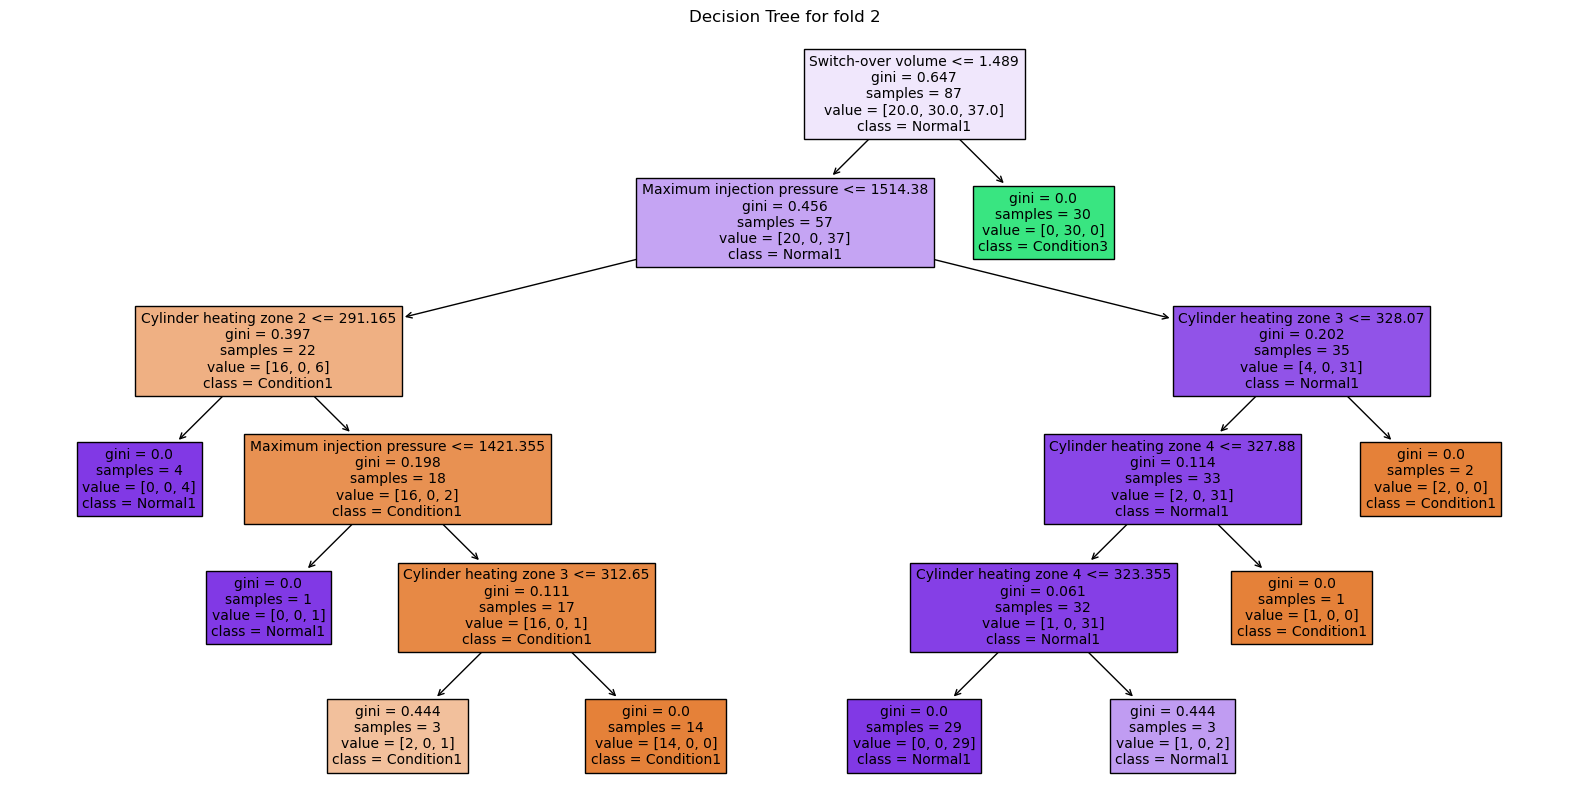

Fold 3 - Training data length: 87 | Test data length: 29
Accuracy for fold 3: 0.8276
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.67      0.57      0.62         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.77      0.83      0.80        12

    accuracy                           0.83        29
   macro avg       0.81      0.80      0.81        29
weighted avg       0.82      0.83      0.82        29



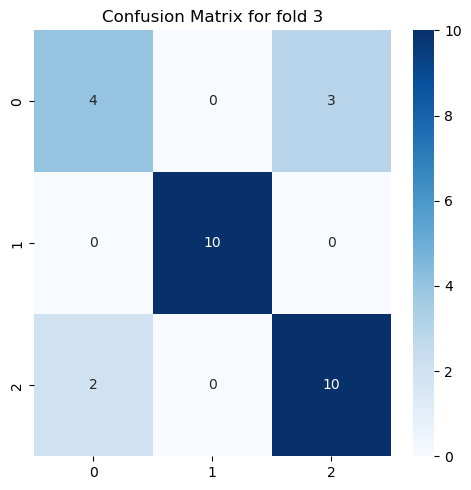

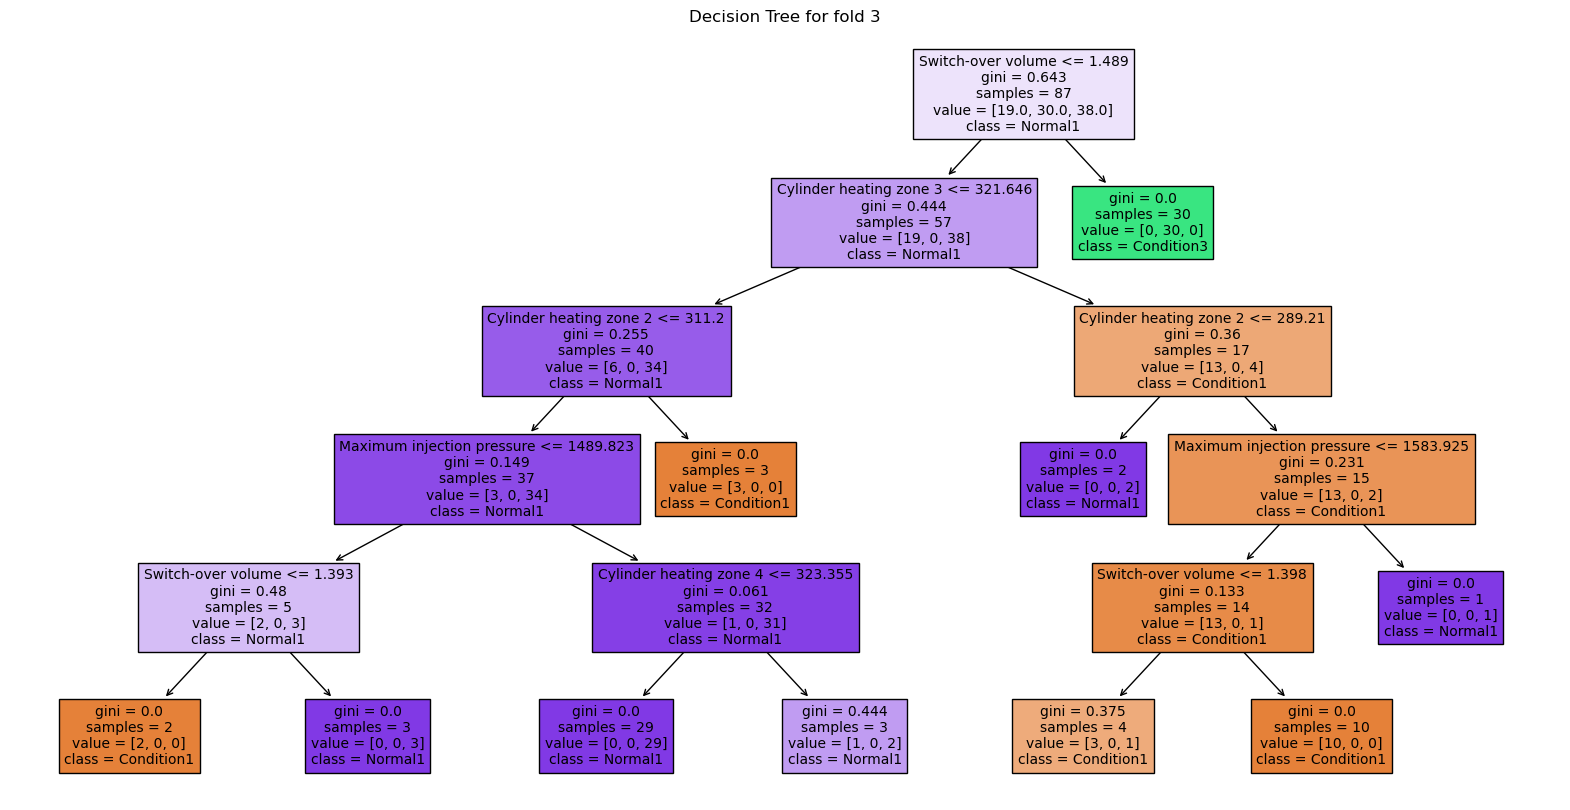

Fold 4 - Training data length: 87 | Test data length: 29
Accuracy for fold 4: 1.0
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      1.00      1.00         7
  Condition3       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



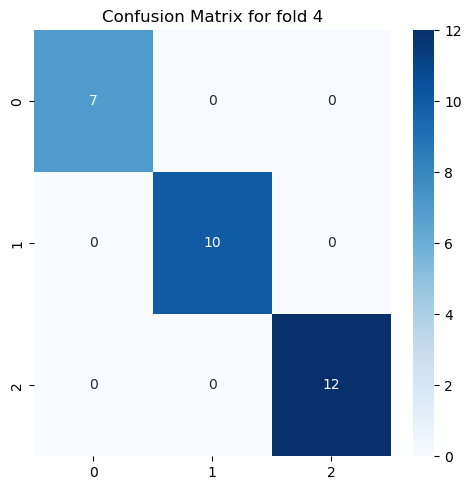

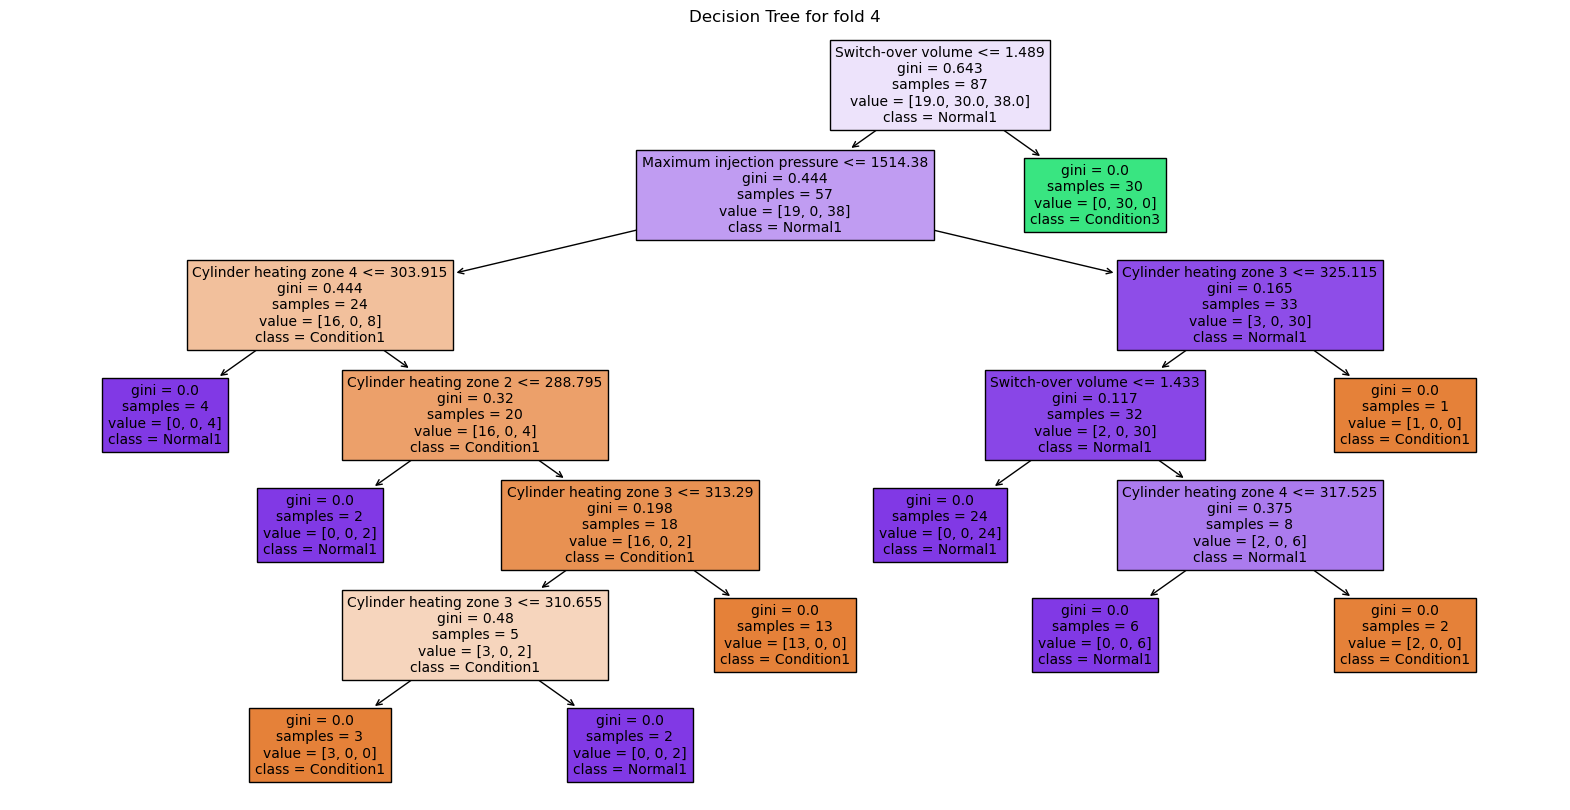

Average accuracy across folds: 0.8966


In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs, confusion_matrix, classification_report
from sklearn import tree

# Load your data (X and y) from previous step
# Assuming X and y have already been split from the dataset

# Best selected features from Code 1
selected_features = ['Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 
                     'Maximum injection pressure', 'Switch-over volume']

# Define decision model with best hyperparameters from RandomizedSearchCV
model_name = 'Decision Tree'
model2 = dt(criterion='gini', max_depth=48, min_samples_leaf=1, min_samples_split=5, random_state=0)

# Split data into 4-fold cross-validation
cv = sk(n_splits=4, shuffle=True, random_state=0)

# Accuracy list for selected features
accuracy_l_selected = []

# List to store feature importances from each fold
all_importances = []

# Define a save path for results (ensure the directory exists)
savePath = r"C:\path\to\save\results"

# Ensure the directory exists, if not, create it
if not os.path.exists(savePath):
    os.makedirs(savePath)

# Perform cross-validation to calculate feature importance across all folds
for tr_i, te_i in cv.split(X[selected_features], y):
    X_tr = X[selected_features].iloc[tr_i]
    X_v = X[selected_features].iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    # Print the training and test data lengths for each fold
    print(f"Training data length: {len(X_tr)} | Test data length: {len(X_v)}")
    
    # Fit decision tree model and predict
    model2.fit(X_tr, y_tr)
    
    # Store feature importances for this fold
    all_importances.append(model2.feature_importances_)

# Average the importances across folds
avg_importances = np.mean(all_importances, axis=0)

# Create DataFrame for averaged importances
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': avg_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot with features on the x-axis and importance on the y-axis for a vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')
plt.title("Averaged Feature Importances Across Folds")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()

# Add value labels on bars
for index, value in enumerate(importance_df['Importance']):
    plt.text(index, value, f"{value:.3f}", ha='center', va='bottom')

# Save the bar chart
plt.savefig(os.path.join(savePath, 'averaged_feature_importances.png'))
plt.show()

# Train the model with the selected features and evaluate performance
accuracy_l_selected = []
for fold, (tr_i, te_i) in enumerate(cv.split(X[selected_features], y), 1):
    X_tr = X[selected_features].iloc[tr_i]
    X_v = X[selected_features].iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    # Print the training and test data lengths for each fold
    print(f"Fold {fold} - Training data length: {len(X_tr)} | Test data length: {len(X_v)}")
    
    # Fit decision tree model and predict
    model2.fit(X_tr, y_tr)
    y_p = model2.predict(X_v)
    
    # Calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print(f"Accuracy for fold {fold}: {accuracy.round(4)}")
    accuracy_l_selected.append(accuracy)
    
    # Display classification report
    print(f"Classification Report for fold {fold}:\n", classification_report(y_v, y_p))
    
    # Use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for fold {fold}')
    plt.tight_layout()
    plt.savefig(os.path.join(savePath, f'confusion_matrix_selected_{fold}.png'))
    plt.show()

    # Display the decision tree model
    plt.figure(figsize=(20, 10))
    tree.plot_tree(model2, filled=True, feature_names=selected_features, class_names=np.unique(y).astype(str), fontsize=10)
    plt.title(f'Decision Tree for fold {fold}')
    plt.savefig(os.path.join(savePath, f'decision_tree_fold_{fold}.png'))
    plt.show()

# Print final accuracy statistics across folds
mean_accuracy = np.mean(accuracy_l_selected)
print("Average accuracy across folds:", mean_accuracy.round(4))
